## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

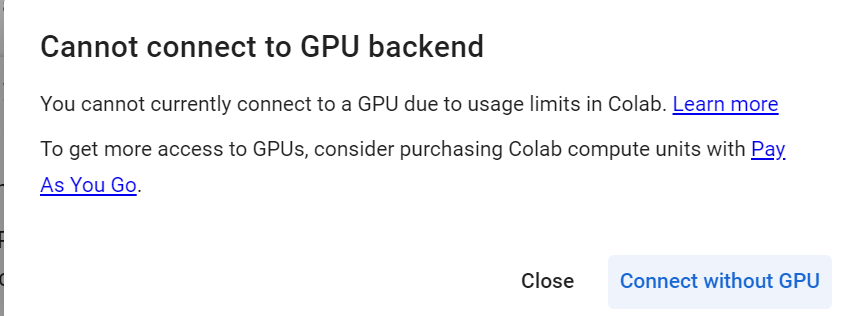

## Installing and Importing Necessary Libraries

### General Modules and machine learning modules

In [1]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning library
import torch

# sklearn related
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    classification_report
)


# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer


# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier


# tensorflow & keras imports
import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.

# from keras import backend as K   # Abstraction layer for neural network backend engines. ## Don't use this because it's the standalone version of the backend
from tensorflow.keras import backend as K   # Abstraction layer for neural network backend engines. This one is integrated with Tensorflow

# Import models, layers, metrics, and optimizers from tensorflow.keras
from tensorflow.keras.models import Sequential #sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input #importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras.metrics import AUC, Precision, Recall  # Metrics for model evaluation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  #regularization method to prevent the overfitting
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from tensorflow.keras.layers import BatchNormalization
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing import image


# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# to ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

### NLP Related Modules

**Modules Loaded**

**NLTK (Natural Language Tookkit)**
  - Tokenization: Splits text into words or sentences.
  - Stemming and Lemmatization: Reduces words to their root form.
  - POS Tagging: Assigns part-of-speech tags (e.g., noun, verb) to words in a sentence.
  - Named Entity Recognition (NER): Identifies proper nouns (e.g., people, organizations) in text.
  - Parsing and Syntax Trees: Creates syntactic structures of sentences
  - Text Classification: Provides tools for text classification tasks.
  - Corpora Access: Offers access to a wide range of linguistic datasets (e.g., WordNet, movie reviews, etc.).
  - Stopword Removal: Provides a list of common words to ignore (like "the," "is," etc.)
  - Concordance and Frequency Distribution: Helps in finding word occurrences and their frequencies in a corpus
  - N-Gram and Collocations: Identifies common word combinations and patterns.

**Transformers**

- **sentence_transformer**
  - sentence_transformer is part of Hugging Face ecosystem, designed to do sentence-level embeddings,semantic similarity, custering and text retreival
  - it supports models like BERT, RoBERTa
- **transformers**
  - transformers is also part of Hugging Face ecosystem designed to support a wide range of transformer-based models, like BERT, GPT, T5.
  - it aids in various NLP tasks like text classification, translation, summarization and more.  
  - T5 is an encoder-decoder model from google research

- **Word-piece transformers**
  - word piece transformers breaks down text into subword tokens, meaning it will tokenize words into smaller pieces where necessary.
  - examples:
    - Word2Vec
    - Glove

- **sequence-level transformers**
    - google/flan-t5-large    
      - T5 encodes entire sequences (made up of subwords), and transformer models expect consistent input sizes for efficient batch processing, padding and truncation help ensure that all sequences fit within the required format

📙 **sequence-level transformers handle long sequences or multiple sentences together, while sentence-level transformers focus on encoding individual sentences into meaningful vector**


In [2]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 98.8 MB/s eta 0:00:00


In [3]:
# to load transformer models
from sentence_transformers import SentenceTransformer

from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline

# To import Word2Vec
from gensim.models import Word2Vec

# GloVe
from gensim.scripts.glove2word2vec import glove2word2vec

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer







[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Text Processing**
- **Unidecode**
  - **Purpose:** The unidecode package is used to convert Unicode text into ASCII characters. It removes diacritics and accents from characters, effectively "normalizing" text in terms of encoding.
  - **Use Case:** It is useful in text preprocessing tasks where you need to simplify text by stripping away non-ASCII characters while retaining the basic structure of the word.  

  Example:

```python
from unidecode import unidecode

# Example of a string with accented characters
text = "Café déjà vu à Noël"

# Convert the text to ASCII using unidecode
ascii_text = unidecode(text)

# Output the result
print(ascii_text)
```

In [4]:
! pip install unidecode -q
from unidecode import unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 17.9 MB/s eta 0:00:00


In [5]:
## Text Processing
# to use regular expressions for manipulating text data
import re

# to manipulate string data
import string

# Unidecode
from unidecode import unidecode

## Setting Random seed for consistent resluts

In [6]:
# Set the seed using tensorflow.keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

from tensorflow.keras.utils import set_random_seed
set_random_seed(42)  # Use tensorflow.keras.utils to set the seed for consistency

## Setup device agnostic Code (use GPU if needed)

In [7]:
# Query CPU information
print("CPU Information is shown below:")
!cat /proc/cpuinfo | grep 'model name' | uniq

CPU Information is shown below:
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz


In [8]:
!nvidia-smi # if no GPU then command not found

Thu Oct 17 21:52:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
# Check if TensorFlow is using a GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


**if GPU is available use it by referring to `device = device`**

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## **Loading the dataset**

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import os
os.chdir('/content/drive/MyDrive/GL-Projects/Project5-NLP/')
os.listdir()

['SM-V2-NLP_Project_Full_Code-1.ipynb',
 'stock_news.csv',
 'glove.6B.100d.txt.word2vec',
 'NLP_Project_Full_Code-1.ipynb',
 'NLP_Template.pptx',
 'xgboost_model.json',
 'SM_V0-NLP_Project_Full_Code-1.ipynb',
 'Temp_SM_V1-NLP_Project_Full_Code-1.ipynb',
 'df_T3.csv',
 'HF_best_rf_newsOnly.sav',
 'NLP_Project_Low_Code-2.ipynb',
 '.env',
 'SM_V1-NLP_Project_Full_Code-1.ipynb',
 'SM-tried_minority_V2-NLP_Project_Full_Code-1.ipynb',
 'best_xgb_model.pkl',
 'cleaned_stock_data.csv',
 'df_Word2Vec.csv',
 'df_Glove.csv',
 '1st-submission-SM_V2-NLP_Project_Full_Code-1.html',
 'df_T5.csv',
 'w2vec_best_rf.pkl',
 'w2vec_best_rf_newsOnly.pkl',
 'glove_best_rf.pkl',
 'glove_best_rf_newsOnly.pkl',
 'T5_best_rf.pkl',
 'y_H.csv',
 'HF_best_rf_newsOnly.pkl',
 'HFT5_best_rf_newsOnly.pkl',
 'data_1.csv',
 'SM-V2-NLP_Project_Full_Code-1.html',
 'SM-submitted_1_V2-NLP_Project_Full_Code-1.ipynb']

## **Data Overview**

In [13]:
# load stock_data
data = pd.read_csv('stock_news.csv')

In [14]:
# make a copy of data, called stock_data
stock_data = data.copy()

In [15]:
stock_data.head(2)

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,-1


In [16]:
stock_data.shape

(349, 8)

In [17]:
stock_data.columns

Index(['Date', 'News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label'], dtype='object')

In [18]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


## Convert `Date` to datetime, so we can calculate

In [19]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    349 non-null    datetime64[ns]
 1   News    349 non-null    object        
 2   Open    349 non-null    float64       
 3   High    349 non-null    float64       
 4   Low     349 non-null    float64       
 5   Close   349 non-null    float64       
 6   Volume  349 non-null    int64         
 7   Label   349 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 21.9+ KB


In [20]:
# check for duplicates
stock_data.duplicated().sum()

0

**Observations:**
- there are 349 rows and 8 columns
- there are no null values in any column
- no rows are duplicated
- columns consists of objects, floats and integers (float64(4), int64(2), object(2))

## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

## checking for balance of sentiment

In [21]:
stock_data['Label'].value_counts(normalize=True)

,proportion
Label,
0,0.487106
-1,0.283668
1,0.229226


**Observation:**
- Neutral Sentiment is most common
- almost equal number of Negative and Positive sentiments
- However, the dataset is imbalanced, there are double the number of Neutral Sentiments than Negative or positive

**Length of News Content**

In [22]:
news_stats = stock_data['News'].str.len().describe().astype(int)
df_news_stats = news_stats.to_frame().reset_index()

# Rename the columns for clarity
df_news_stats.columns = ['Statistic', 'Value']
df_news_stats

,Statistic,Value
0,count,349
1,mean,311
2,std,39
3,min,110
4,25%,290
5,50%,315
6,75%,336
7,max,394


In [23]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.legend(["Mean", "Median"])

    plt.show()
    print("Skewness: %f" % data[feature].skew())
    print("Kurtosis: %f" % data[feature].kurt())
    print('=='*60)

##### A note on Kurtosis:
**Kurtosis:** Kurtosis is a statistical measure that describes the shape of a distribution's tails in relation to its overall shape. Specifically, it indicates how heavy or light the tails of the distribution are compared to a normal distribution.

- **Positive Kurtosis** (Leptokurtic): Distributions with heavy tails and a sharp peak.
- **Negative Kurtosis** (Platykurtic): Distributions with light tails and a flatter peak.
- **Zero Kurtosis** (Mesokurtic): Distributions similar to the normal distribution.

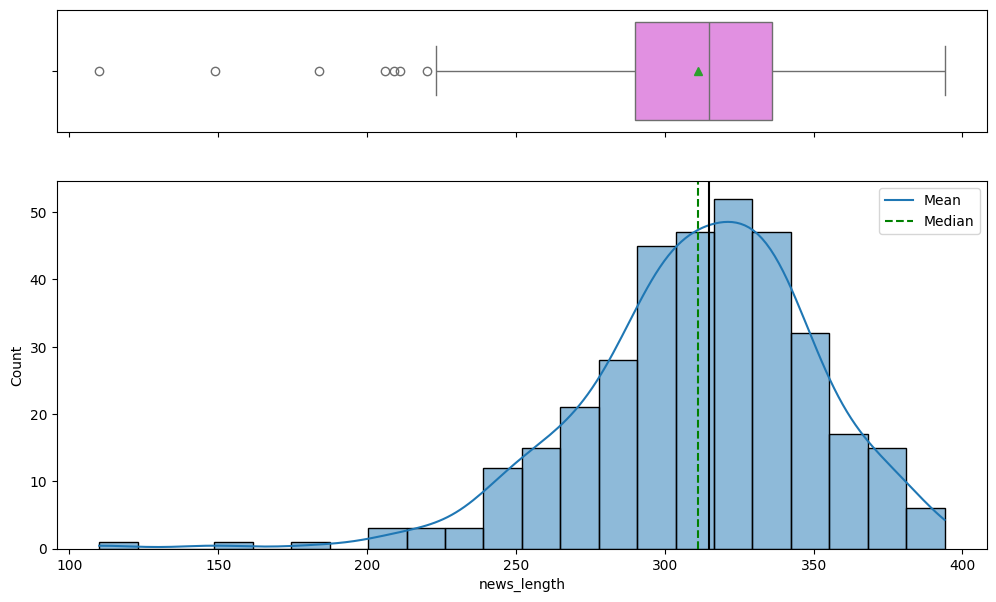

Skewness: -0.874310
Kurtosis: 2.355805


In [24]:
stock_data['news_length'] = stock_data['News'].str.len()
histogram_boxplot(stock_data, 'news_length', kde=True)

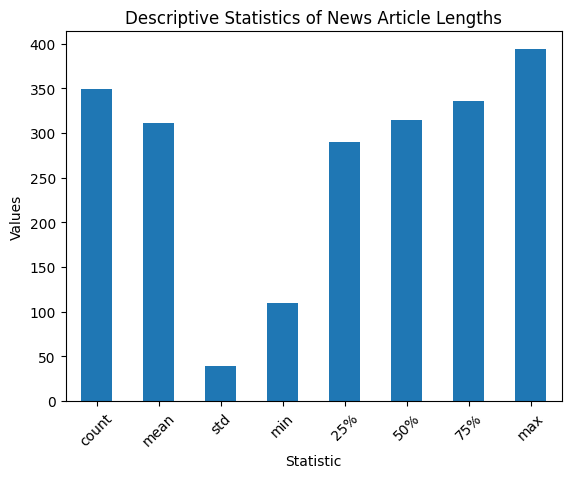

In [25]:
# Bar plot for descriptive statistics
df_news_stats.plot(kind='bar', x='Statistic', y='Value', legend=False)

# Set title and labels
plt.title('Descriptive Statistics of News Article Lengths')
plt.ylabel('Values')
plt.xticks(rotation=45)

# Show plot
plt.show()


**Observations:**
- Mean: 311
- Median: 315
- Max: 394
- Min: 110

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

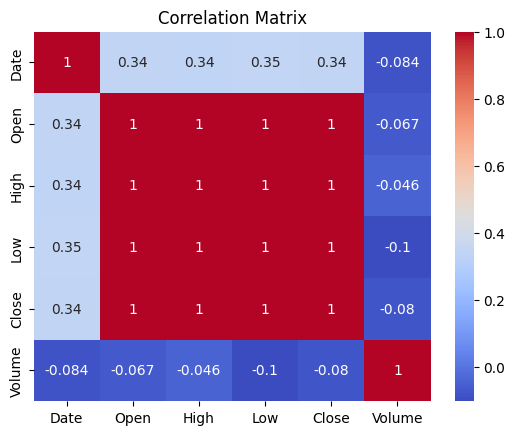

In [26]:
# Correlation matrix for continuous variables
corr_matrix = stock_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Observations from: correlation matrix**
- The strong positive correlations between Open, High, Low, and Close indicate that these metrics move together almost perfectly, which is typical for stock data, as they all represent parts of the same trading day.
- The weak negative correlations with Volume suggest that changes in the trading volume don't have a significant impact on the stock prices in this dataset.
- There is a moderate upward trend in stock prices over time (as indicated by the correlation between Date and the prices).



## Close price vs. sentiment

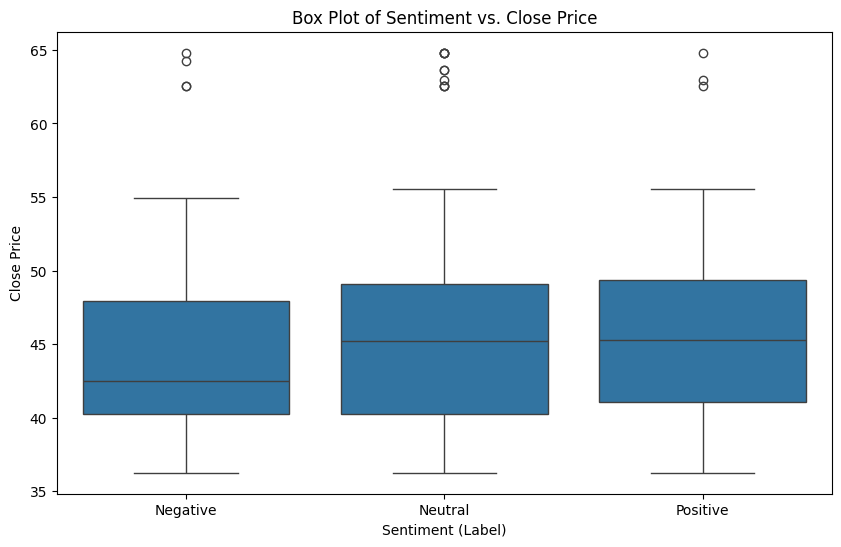

In [27]:
# Box plot of sentiment (Label) vs Close price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Close', data=stock_data)

# Set title and labels
plt.title('Box Plot of Sentiment vs. Close Price')
plt.xlabel('Sentiment (Label)')
plt.ylabel('Close Price')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])  # Custom labels for sentiment
plt.show()


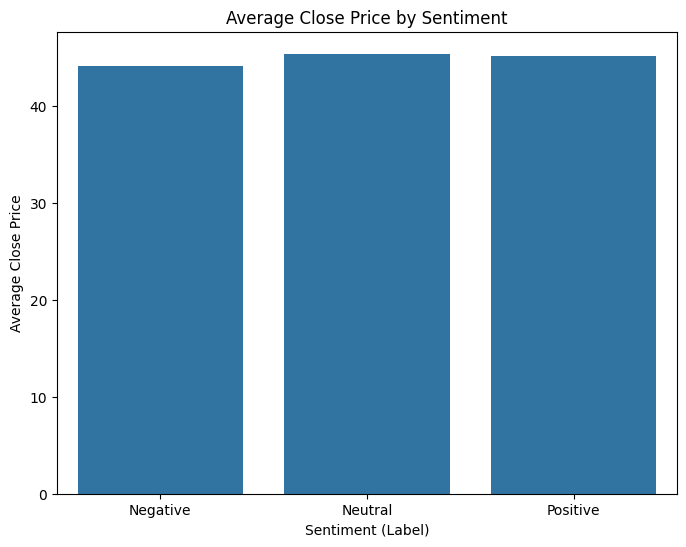

In [28]:
# Calculate the average Close price for each sentiment category
avg_price_by_sentiment = stock_data.groupby('Label')['Close'].mean().reset_index()

# Bar plot for average Close price by sentiment
plt.figure(figsize=(8, 6))
sns.barplot(x='Label', y='Close', data=avg_price_by_sentiment)

# Set title and labels
plt.title('Average Close Price by Sentiment')
plt.xlabel('Sentiment (Label)')
plt.ylabel('Average Close Price')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])  # Custom labels for sentiment
plt.show()


**Observations:**
- Negative news makes the stock price go down, but not signifcantly
- There does not seem to be much effect on Stock Price change between Neutral and Positive Sentiments

### **Day of week vs. price**

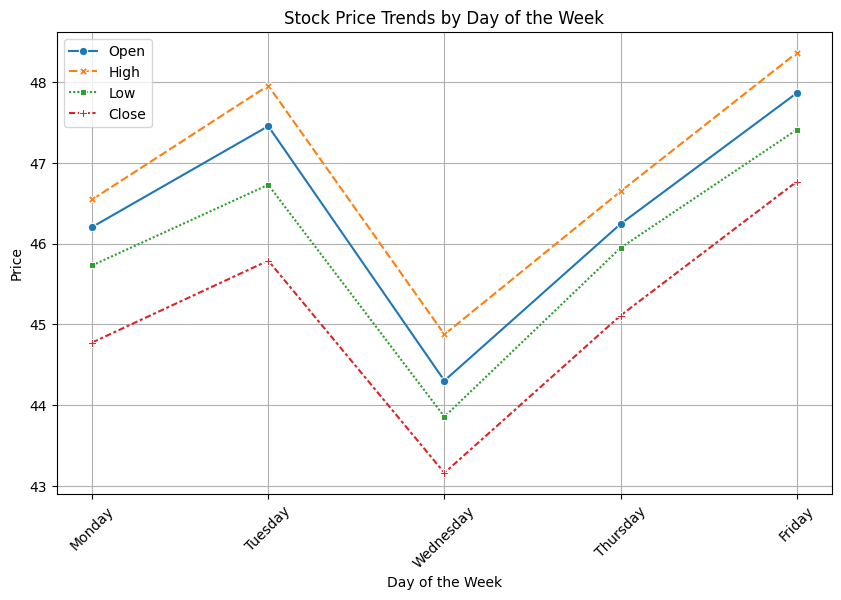

In [29]:
# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
stock_data['Day_of_Week'] = stock_data['Date'].dt.day_name()

# Calculate the mean of 'Open', 'Close', etc. for each day of the week
price_trends = stock_data.groupby('Day_of_Week')[['Open', 'High', 'Low', 'Close']].mean()

# Reorder the index to start from Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_trends = price_trends.reindex(ordered_days)

# Plot the price trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_trends, markers=True)
plt.title('Stock Price Trends by Day of the Week')
plt.ylabel('Price')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


**Observation:**
- Wednesday prices are lowest
- Friday prices go up highest

### **Month of Year vs. price**

**Seems like data is only present from January to April**

In [30]:
# Extract the month of the year as full names (e.g., January, February, etc.)
stock_data['Month_of_Year'] = stock_data['Date'].dt.month_name()
display(stock_data['Month_of_Year'].unique())


array(['January', 'February', 'March', 'April'], dtype=object)

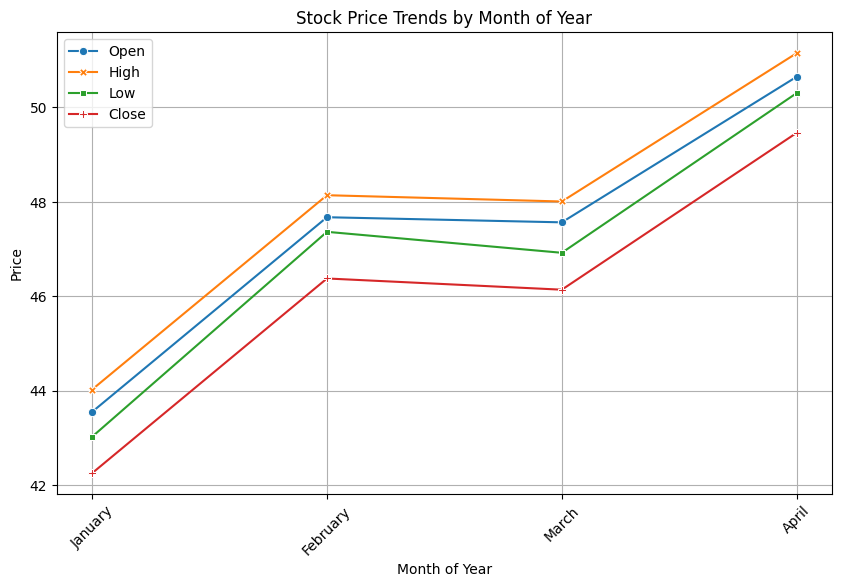

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the mean of 'Open', 'Close', etc. for each month of the year
price_trends = stock_data.groupby('Month_of_Year')[['Open', 'High', 'Low', 'Close']].mean()

# Reorder the index to start from January
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                  'August', 'September', 'October', 'November', 'December']
price_trends = price_trends.reindex(ordered_months)

# Plot the price trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_trends, markers=True, dashes=False)

# Set the title and labels
plt.title('Stock Price Trends by Month of Year')
plt.ylabel('Price')
plt.xlabel('Month of Year')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


**Observation:**
- stock price went up from January through April
- between February to March was static

## **Data Preprocessing**

### Let's copy the dataframe

In [32]:
stock_data_original = stock_data.copy()

### write a class to pre-process data

- remove special characters
- remove stopwords
- use unidecode to remove accents
- change to lower case and remove white spaces, left/right
- stem the words to get root words

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

class TextProcessor:
    def __init__(self):
        # Initialize the Porter Stemmer and load stopwords
        self.ps = PorterStemmer()
        nltk.download('stopwords')
        self.stop_words = set(stopwords.words('english'))

    def preprocess(self, text):
        """
        Embed the query using GloVe after preprocessing the text.
        """
        # Preprocess the text
        text = self.remove_special_characters(text)
        text = unidecode(text)
        text = text.lower().strip() # convert to lower and remove extra white spaces
        text = self.remove_stopwords(text)
        text = self.apply_porter_stemmer(text)

        return text


    def remove_stopwords(self, text):
        """
        Remove stopwords from the text using NLTK stopwords list.
        """
        words = text.split()
        filtered_text = ' '.join([word for word in words if word not in self.stop_words])
        return filtered_text

    def apply_porter_stemmer(self, text):
        """
        Apply the Porter Stemmer to each word in the text.
        """
        words = text.split()
        stemmed_text = ' '.join([self.ps.stem(word) for word in words])
        return stemmed_text

    def remove_special_characters(self, text):
        """
        Remove special characters from the text.
        (This is a placeholder; customize it as per your use case)
        """
        # Example: Remove non-alphanumeric characters (modify as needed)
        return ''.join(e for e in text if e.isalnum() or e.isspace()) # isalnum: is alphanumeric.  In other words keep alphanumeric and spaces, get rid of other things



### Clean the News column and add the cleaned data to a column called News_processed

In [34]:
# Initiate the class
processor = TextProcessor() # creating an instance of our class

# Applying the function to remove special characters
stock_data['News_processed'] = stock_data['News'].apply(processor.preprocess) # creates the 'News_Processed' column at the very end

# Move the 'processed_text' column to be right after the 'News' column
news_index = stock_data.columns.get_loc('News')  # Get the index of the 'News' column
stock_data.insert(news_index + 1, 'News_processed', stock_data.pop('News_processed')) # moves the `News_Processed' column after News column


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
stock_data.head(5)

,Date,News,News_processed,Open,High,Low,Close,Volume,Label,news_length,Day_of_Week,Month_of_Year
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",tech sector experienc signific declin aftermarket follow appl q1 revenu warn notabl supplier includ skywork broadcom lumentum qorvo tsmc saw stock drop respons appl downward revis revenu expect quarter previous announc januari,41.740002,42.244999,41.482498,40.246914,130672400,-1,324,Wednesday,January
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",appl lower fiscal q1 revenu guidanc 84 billion earlier estim 8993 billion due weaker expect iphon sale announc caus signific drop appl stock price neg impact relat supplier lead broader market declin tech indic nasdaq 10,41.740002,42.244999,41.482498,40.246914,130672400,-1,323,Wednesday,January
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",appl cut fiscal first quarter revenu forecast 8993 billion 84 billion due weaker demand china fewer iphon upgrad ceo tim cook also mention constrain sale airpod macbook appl share fell 85 post market trade asian supplier like hon,41.740002,42.244999,41.482498,40.246914,130672400,-1,296,Wednesday,January
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",news articl report yield longdat us treasuri secur hit lowest level nearli year januari 2 2019 due concern health global economi follow weak econom data china europ well partial us govern shutdown appl,41.740002,42.244999,41.482498,40.246914,130672400,-1,300,Wednesday,January
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",appl revenu warn led declin usd jpi pair gain japanes yen investor sought safeti highli liquid currenc appl underperform q1 forecast revenu 84 billion compar analyst expect 915 billion trigger risk avers mood market,41.740002,42.244999,41.482498,40.246914,130672400,-1,305,Wednesday,January


In [36]:
# save the df
stock_data.to_csv('cleaned_stock_data.csv', index=False)

In [37]:
# load the df
stock_data = pd.read_csv('cleaned_stock_data.csv')

**Datasets available now:**
1. stock_data_original
2. stock_data

## **Word Embeddings**

### Word2Vec

#### **Word2Vec**

- `Word2Vec` is imported from Gensim library

- while the name Word2Vec emphasizes the transformation from words to vectors, **it is understood that these vectors are embeddings** because they capture the meaning and relationships of words in a way that enables semantic reasoning.-

- **How Word2Vec Generates Embeddings:**
  - Input: Word2Vec takes a large corpus of text as input and processes it to learn the relationships between words.
  - Output: Each word is mapped to a high-dimensional vector. These vectors represent words in a continuous vector space, and the distances or directions between vectors capture semantic relationships.

- `Word2Vec` takes the following important parameters:
    1. `word_list`: List of all words in all documents
    2. `vector_size`: Determines the size of the word vectors
    2. `min_count`: It will ignore all the words with a total frequency lower than this.
    3. `Workers`: These are the number of threads to train the model.
    4. 'window': Size of context relative to target word.

- By default, it creates word vectors of size 100.

- If **sg=0 (default), it uses CBOW** (Continuous Bag of Words), which **predicts a target word based on its surrounding context words.**


- If **sg=1, it uses Skip-Gram**, which **predicts surrounding context words given a target word**

    - **whether you use CBOW (sg=0) or Skip-Gram (sg=1), the output of the Word2Vec model will give you word embeddings.**

    - Once the model is trained, you can retrieve the embedding (vector) for any word in your vocabulary. These embeddings are vectors of real numbers that represent the semantic meaning of the words, capturing relationships such as similarity or analogy.


- **pretrained model:**

```python
from gensim.models import KeyedVectors

# Load the pre-trained Google News word2vec model
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# Get the vector for the word 'king'
vector = model['king']

# Find most similar words to 'king'
similar_words = model.most_similar('king')
```

- **training your own model - Define your corpus as a list of tokenized sentences:**

```python
from gensim.models import Word2Vec

# Define your corpus as a list of tokenized sentences
sentences = [["this", "is", "a", "sentence"], ["another", "sentence"]]

# Train Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# Get the vector for a word
vector = model.wv['sentence']

# Checking top 5 similar words to the word 'best'
similar = model.wv.similar_by_word('best', topn=5)
print(similar)

```

## Negative Sampling
- generally used with skip-gram

- Negative sampling helps to reduce computation by sampling a small number of " negative" words, making the Skip-Gram model more scalable.
- It is typically used with Skip-Gram (sg=1).
The negative parameter controls how many negative samples to draw (common values are between 5 and 20).

- Negative Sampling is generally faster and more efficient for large datasets.
- Hierarchical Softmax is an alternative approach where the full softmax is approximated using a binary tree. It can be more efficient for smaller datasets or vocabularies.

```python
# Word2Vec with Skip-Gram and Negative Sampling
model = Word2Vec(sentences, vector_size=100, window=5, sg=1, negative=10)
```

Here, negative=10 means the model will generate 10 negative samples for each positive sample. If negative=0, no negative sampling is used, and the model uses hierarchical softmax instead.

If you prefer hierarchical softmax, you set negative=0 (the default) and control the hierarchical softmax through the hs parameter.

```python
model = Word2Vec(sentences, vector_size=100, window=5, sg=1, hs=1, negative=0)
```    

In [38]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in stock_data['News_processed'].values]

In [39]:
len(words_list)

349

**observation:**
- each News article has been broken down to a list of words.
- i.e.  the list contains a list of news articles and each item in the list contains a list of words

#### Checking the words_list for 1st `News_processed`

In [40]:
words_list[0][:3] # checking the 1st 3 words for News_cleaned (for 1st News item)

['tech', 'sector', 'experienc']

In [41]:
# Creating an instance of Word2Vec
w2vec_vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = w2vec_vec_size, min_count = 1, window=5, workers = 6, sg=1)

In [42]:
# Checking the total number of word and comparing with total tokens obtained from Word2Vec
# Flatten the words_list
flattened_words_list = [word for sublist in words_list for word in sublist]

# Now, you can compare the lengths:
print(f"Total words in words_list (flattened): {len(flattened_words_list)}")
print(f"Unique words in Word2Vec vocabulary: {len(list(model_W2V.wv.key_to_index))}")


Total words in words_list (flattened): 11589
Unique words in Word2Vec vocabulary: 2727


**Explanation of why the counts of words and Word2Vec are different**

- 11,589 Total Words: This includes every instance of every word across your entire dataset, meaning that some words repeat many times.
2,727 Unique Words: The Word2Vec vocabulary only stores each word once, meaning it counts distinct, unique words.
- **Word Repetition:** Words that occur multiple times in your dataset will be counted once in the Word2Vec vocabulary but multiple times in the words_list. For example, if "stock" appears 100 times in your dataset, it will be counted 100 times in the total words count, but only once in the Word2Vec vocabulary.

- **Word2Vec** captures word semantics based on the context in which words appear, but it does not generate separate embeddings for homonyms **(like "bank" meaning a financial institution vs. "bank" meaning the side of a river)** within the same model. Word2Vec generates one embedding per word in its vocabulary. This means:

  - **Single Embedding per Word:** Both meanings of "bank" (financial and river) will share the same embedding if they appear frequently enough in the training data. The context surrounding the word "bank" helps shape the embedding, but it won't create two separate vectors for the different meanings.

**What is .wv?**
- .wv stands for Word Vectors. It is an attribute in the gensim Word2Vec model that gives access to the vectors associated with words in the model's vocabulary.
- When you train a Word2Vec model using gensim, the model learns a vector representation for each word in your vocabulary. These vectors are stored in .wv.

In [43]:
# Checking the word embedding of a random word (display only 1st 5 embeddings of word)
word = "good"
model_W2V.wv[word][:5]

array([-0.00556064,  0.04971517,  0.03463805,  0.04902715, -0.00760939],
      dtype=float32)

In [44]:
# Checking to confirm that vector size is 300, since we had chosen a vector size of 300 when defining model
word = "good"
model_W2V.wv[word].size

300

In [45]:
# Checking top 5 similar words to the word 'good'
similar = model_W2V.wv.similar_by_word('good', topn=5)
print(similar)

[('chines', 0.9989901781082153), ('includ', 0.9989297986030579), ('follow', 0.9989123344421387), ('compani', 0.9988918900489807), ('offer', 0.9988846182823181)]


**Note**: The similarity between words is computed using cosine similarity.

$\text{cosine_similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \sqrt{\sum_{i=1}^{n} B_i^2}}$

Where:
- A⋅B is the dot product of vectors of A and B
- ∥A∥ is the magnitude (Euclidean norm) of vector A
- ∥B∥ is the magnitude (Euclidean norm) of vector B





#### **creating an average Word2Vec vector for a given document (or sentence)**

This code defines a function, average_vectorizer_Word2Vec, that creates an average Word2Vec vector for a given document (or sentence) by averaging the word vectors of the words present in the document. Then, it applies this function to a pandas DataFrame to create a new DataFrame where each document is represented by its average Word2Vec vector.

- Feature 0, Feature 1, ..., Feature 99 are the vector components (dimensions) that correspond to the averaged embedding across all words in the sentence or document.

- Each column (Feature 0, Feature 1, etc.) represents one dimension of the averaged word embedding for the entire document.
- The number of columns is determined by the size of your word vectors **(vec_size)**, not by the number of words in the document.
- The row in the DataFrame corresponds to the averaged vector for a single document or sentence, encapsulating its overall meaning in a fixed-length vector.

In [46]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

**checking the size of word good from the dictionary**

In [47]:
len(word_vector_dict['good'])

300

In [48]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((w2vec_vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words] # split on white spaces

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word]) # here we are using the dictionary we created earlier

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [49]:
# creating a dataframe of the vectorized documents
df_Word2Vec = pd.DataFrame(stock_data['News_processed'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(w2vec_vec_size)])
df_Word2Vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
0,-0.011213,0.071832,0.047844,0.072802,-0.010869,-0.085069,0.106969,0.203856,0.047937,-0.037527,...,0.019571,0.106782,0.077674,0.033003,0.077728,0.071265,-0.001227,-0.073051,0.072697,0.015747
1,-0.013357,0.085176,0.056447,0.086717,-0.013226,-0.099680,0.125859,0.240482,0.057569,-0.043993,...,0.022546,0.126772,0.091350,0.038866,0.092527,0.083459,-0.002166,-0.086516,0.085370,0.019055
2,-0.011669,0.073823,0.048796,0.076657,-0.011556,-0.087743,0.109995,0.211016,0.050522,-0.037863,...,0.019241,0.110903,0.079956,0.034057,0.080808,0.073347,-0.001716,-0.075967,0.074564,0.016990
3,-0.011745,0.076017,0.049646,0.078338,-0.011837,-0.089852,0.112073,0.217496,0.051440,-0.039532,...,0.019268,0.115228,0.083519,0.036757,0.085067,0.076380,-0.002140,-0.078380,0.077062,0.016857
4,-0.010049,0.063738,0.041901,0.065410,-0.009805,-0.075268,0.095021,0.180479,0.043030,-0.032834,...,0.017092,0.095021,0.068069,0.028948,0.068881,0.062994,-0.001620,-0.064614,0.064027,0.014727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-0.005426,0.036477,0.024565,0.038296,-0.005432,-0.043092,0.053960,0.102646,0.024442,-0.018213,...,0.009394,0.054457,0.038958,0.016771,0.040240,0.036303,-0.000550,-0.037524,0.036734,0.008087
345,-0.009451,0.060916,0.040047,0.061995,-0.009012,-0.071223,0.089295,0.172381,0.041016,-0.031676,...,0.015294,0.090493,0.065941,0.028395,0.066116,0.060221,-0.001814,-0.062454,0.061408,0.013766
346,-0.009829,0.066825,0.044734,0.067365,-0.010491,-0.078469,0.097972,0.189265,0.045493,-0.034826,...,0.017536,0.098918,0.072567,0.030734,0.073570,0.066317,-0.001124,-0.068017,0.066347,0.015593
347,-0.010781,0.071669,0.047099,0.073281,-0.010298,-0.083177,0.105037,0.201209,0.047156,-0.036955,...,0.018517,0.106600,0.076301,0.033230,0.077903,0.070607,-0.002177,-0.071840,0.071956,0.014929


In [50]:
# save the df
df_Word2Vec.to_csv('df_Word2Vec.csv', index=False)

In [51]:
# load the df
df_Word2Vec = pd.read_csv('df_Word2Vec.csv')


#### **Let's visualize the principal components for the Word2Vec Features**

In [52]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize the data
scaler = StandardScaler()
df_Word2Vec_scaled = scaler.fit_transform(df_Word2Vec)


# Apply t-SNE to reduce the dimensionality to 3 components
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(df_Word2Vec_scaled)  # df_Word2Vec_scaled contains the Word2Vec embeddings

# Convert the t-SNE results to a DataFrame
df_tsne_w2v = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2', 'TSNE3'])


# Check the results
display(df_tsne_w2v.head())


,TSNE1,TSNE2,TSNE3
0,7.210889,-0.612042,0.553003
1,16.546688,-0.473305,-1.172868
2,9.962870,0.646787,1.057827
3,12.163713,1.373253,0.852878
4,-3.877608,-0.492812,1.500962


In [53]:
## print out the shape of df_Word2Vec and df_tsne_w2v
print("Shape of df_Word2Vec:", df_Word2Vec.shape)
print("Shape of df_tsne_w2v:", df_tsne_w2v.shape)

Shape of df_Word2Vec: (349, 300)
Shape of df_tsne_w2v: (349, 3)


**Plotting the t-sne with plotly**

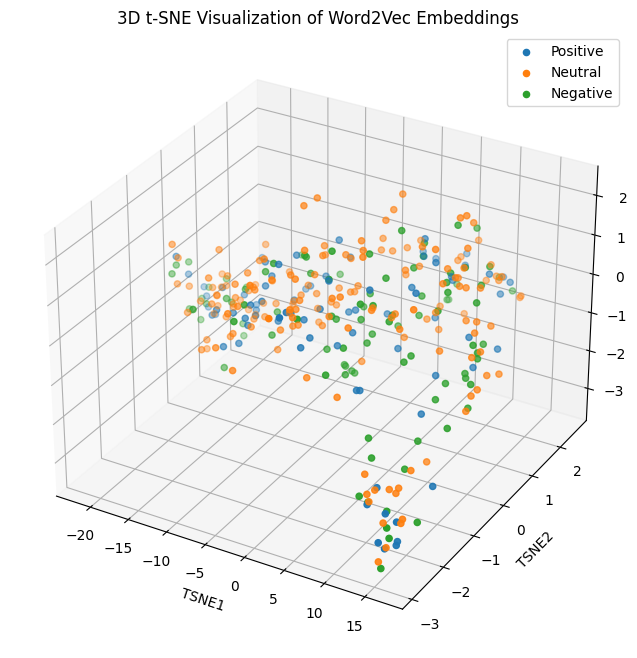

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a mapping for the labels
labels_map = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}

# Create a 3D scatter plot using matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each sentiment category
for i, label in enumerate([1, 0, -1]):
    sub_matrix = df_tsne_w2v[stock_data['Label'] == label].to_numpy()
    ax.scatter(sub_matrix[:, 0], sub_matrix[:, 1], sub_matrix[:, 2], label=labels_map[label])

ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
ax.set_title('3D t-SNE Visualization of Word2Vec Embeddings')
ax.legend()

# Show the plot
plt.show()


**Observations:**
- There seems to be no distinct clusters based on on Word2Vec Features alone

### GloVe

#### **Difference Between Word2Vec and GloVe**

**GloVe (Global Vectors for Word Representation)** and **Word2Vec** are both popular word embedding techniques, but they differ in their underlying approaches and how they generate word vectors.

## Key Differences Between GloVe and Word2Vec

1. **Training Methodology**:
   - **Word2Vec**: Word2Vec uses a **predictive approach**, which means it learns word embeddings by predicting target words from surrounding context words (Skip-Gram) or predicting context words from a target word (CBOW). The model is trained to maximize the probability of word-context pairs in the training corpus.
   - **GloVe**: GloVe, on the other hand, uses a **count-based approach**. It creates a word co-occurrence matrix, which records how often words appear together in the corpus. GloVe then factorizes this matrix, learning embeddings that capture the overall statistical information of word co-occurrences. It aims to directly model the ratio of co-occurrence probabilities.

2. **Local vs. Global Context**:
   - **Word2Vec**: Focuses on **local context**. It only considers the surrounding words of a target word in a small window, meaning it learns embeddings based on short-term context.
   - **GloVe**: Focuses on the **global context**. It uses the entire corpus to construct the co-occurrence matrix, which captures long-range dependencies and the overall statistical relationships between words.

3. **Objective Function**:
   - **Word2Vec**: The objective function in Word2Vec is to maximize the likelihood of predicting a word from its context (or vice versa, depending on the model).
   - **GloVe**: GloVe’s objective function is to minimize the difference between the dot product of word vectors and the logarithm of their co-occurrence probability. This means GloVe tries to preserve the ratio of word co-occurrences in the vector space.

4. **Efficiency**:
   - **Word2Vec**: Word2Vec learns directly from raw text by iterating over windows of words, making it more **efficient** in terms of memory usage for very large datasets.
   - **GloVe**: GloVe requires the creation of a large co-occurrence matrix, which can be memory-intensive for large vocabularies, but this method allows it to capture more global information.

5. **Handling Rare Words**:
   - **Word2Vec**: Since Word2Vec is trained on context windows, it learns better from rare words that appear in varied contexts.
   - **GloVe**: GloVe might struggle more with rare words because it relies on the word’s co-occurrence statistics across the entire corpus.

## How They Compare in Practice

- **Word2Vec** excels in capturing nuanced, short-term contextual relationships between words (e.g., "man is to woman as king is to queen").
- **GloVe** captures more long-range, global relationships (e.g., "ice" and "steam" are both related to "water" but in different ways based on their overall co-occurrence in a large corpus).

## Similarities

1. **Embedding Structure**: Both techniques result in word embeddings that place semantically similar words closer together in the vector space.
2. **Dimensionality**: Both GloVe and Word2Vec produce word vectors of fixed dimensionality (e.g., 100 or 300 dimensions), which can be used in downstream NLP tasks.
3. **Pre-trained Models**: Both Word2Vec and GloVe have widely used pre-trained models that can be applied without having to retrain on large datasets.

## Example of Using GloVe

GloVe embeddings are often used as pre-trained models. For instance, the popular 6B GloVe dataset, trained on Wikipedia and Gigaword, is commonly used for NLP tasks.

```python
import gensim
from gensim.scripts.glove2word2vec import glove2word2vec

# Load the GloVe pre-trained embeddings
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Get the vector for a word
vector = model['king']
```

**own model**
- more involved.  Look up chatgpt


| Feature               | Word2Vec                               | GloVe                                  |
|-----------------------|----------------------------------------|----------------------------------------|
| **Approach**           | Predictive (based on context windows)  | Count-based (co-occurrence matrix)     |
| **Training Method**    | Learns by predicting word-context pairs| Learns by factorizing word co-occurrence matrix |
| **Context**            | Local (context windows)                | Global (entire corpus)                 |
| **Objective**          | Maximizes likelihood of word-context pairs| Minimizes difference between co-occurrence ratios |
| **Efficiency**         | More memory-efficient                  | Requires more memory for co-occurrence matrix |
| **Handling Rare Words**| Better for rare words                  | May struggle with rare words           |


**A Note highlghting the difference on what we are doing with Word2Vec and GloVe**

**Key Differences:**

**- Training:**
  - **Word2Vec:** You train a model on your data, which means the word vectors (embeddings) are tailored to your dataset. The embeddings capture semantic relationships based on the text in News_processed.
  - **GloVe:** You are using a pretrained model that has been trained on a general corpus. The word vectors are not specific to your dataset but are more generalized representations of word meanings.

**- Embedding Source:**
- **Word2Vec:** The embeddings are created from your own data.
- **GloVe:** The embeddings are pretrained on external data and applied to your data.


#### **Create the glove_model**

In [55]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [56]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [57]:
# Checking the word embedding of a random word
word = "good"
glove_model[word]

array([-0.030769 ,  0.11993  ,  0.53909  , -0.43696  , -0.73937  ,
       -0.15345  ,  0.081126 , -0.38559  , -0.68797  , -0.41632  ,
       -0.13183  , -0.24922  ,  0.441    ,  0.085919 ,  0.20871  ,
       -0.063582 ,  0.062228 , -0.051234 , -0.13398  ,  1.1418   ,
        0.036526 ,  0.49029  , -0.24567  , -0.412    ,  0.12349  ,
        0.41336  , -0.48397  , -0.54243  , -0.27787  , -0.26015  ,
       -0.38485  ,  0.78656  ,  0.1023   , -0.20712  ,  0.40751  ,
        0.32026  , -0.51052  ,  0.48362  , -0.0099498, -0.38685  ,
        0.034975 , -0.167    ,  0.4237   , -0.54164  , -0.30323  ,
       -0.36983  ,  0.082836 , -0.52538  , -0.064531 , -1.398    ,
       -0.14873  , -0.35327  , -0.1118   ,  1.0912   ,  0.095864 ,
       -2.8129   ,  0.45238  ,  0.46213  ,  1.6012   , -0.20837  ,
       -0.27377  ,  0.71197  , -1.0754   , -0.046974 ,  0.67479  ,
       -0.065839 ,  0.75824  ,  0.39405  ,  0.15507  , -0.64719  ,
        0.32796  , -0.031748 ,  0.52899  , -0.43886  ,  0.6740

In [58]:
len(glove_model[word])

100

**Observation:**
- 100 embeddings for each word in the glove model

#### check for similarity for words

In [59]:
word = "good"
result = glove_model.most_similar("good", topn=5)
print(result)

[('better', 0.893191397190094), ('sure', 0.8314563035964966), ('really', 0.8297762274742126), ('kind', 0.8288268446922302), ('very', 0.8260800242424011)]


#### **creating an average glove vector for a given document (or sentence)**

In [60]:
# Creating a dictionary from keys and vectors
glove_words = glove_model.index_to_key
glove_vectors = glove_model.vectors

glove_word_vector_dict = dict(zip(glove_words,list(glove_vectors)))

In [61]:
glove_word_vector_dict['good'] # searching for the value by key good

array([-0.030769 ,  0.11993  ,  0.53909  , -0.43696  , -0.73937  ,
       -0.15345  ,  0.081126 , -0.38559  , -0.68797  , -0.41632  ,
       -0.13183  , -0.24922  ,  0.441    ,  0.085919 ,  0.20871  ,
       -0.063582 ,  0.062228 , -0.051234 , -0.13398  ,  1.1418   ,
        0.036526 ,  0.49029  , -0.24567  , -0.412    ,  0.12349  ,
        0.41336  , -0.48397  , -0.54243  , -0.27787  , -0.26015  ,
       -0.38485  ,  0.78656  ,  0.1023   , -0.20712  ,  0.40751  ,
        0.32026  , -0.51052  ,  0.48362  , -0.0099498, -0.38685  ,
        0.034975 , -0.167    ,  0.4237   , -0.54164  , -0.30323  ,
       -0.36983  ,  0.082836 , -0.52538  , -0.064531 , -1.398    ,
       -0.14873  , -0.35327  , -0.1118   ,  1.0912   ,  0.095864 ,
       -2.8129   ,  0.45238  ,  0.46213  ,  1.6012   , -0.20837  ,
       -0.27377  ,  0.71197  , -1.0754   , -0.046974 ,  0.67479  ,
       -0.065839 ,  0.75824  ,  0.39405  ,  0.15507  , -0.64719  ,
        0.32796  , -0.031748 ,  0.52899  , -0.43886  ,  0.6740

In [62]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((glove_vec_size,), dtype="float64") # np.zeros exepcts a tuple, hence (glove_vec_size,)

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [63]:
# checking to see how many News articles need to be embedded
stock_data['News_processed'].size

349

In [64]:
glove_vec_shape = glove_vectors.shape
glove_vec_size = glove_vec_shape[1]
print(f"glove_vec_shape: {glove_vec_shape}")
print(f"glove_vec_size: {glove_vec_size}")

glove_vec_shape: (400000, 100)
glove_vec_size: 100


In [65]:
import pandas as pd

batch_size = 170  # Set batch size based on your available memory and data size
num_batches = len(stock_data) // batch_size + 1  # Calculate the number of batches

df_Glove_list = []  # Initialize an empty list to store results

# Process data in batches
for i in range(num_batches):
    print(f"Processing batch {i+1}/{num_batches}")
    batch_data = stock_data['News_processed'][i*batch_size:(i+1)*batch_size]
    batch_df = pd.DataFrame(batch_data.apply(average_vectorizer_GloVe).tolist(),
                            columns=['Feature '+str(i) for i in range(glove_vec_size)])
    df_Glove_list.append(batch_df)  # Append the batch to the list

# Concatenate all the batches to create the full dataframe
df_Glove = pd.concat(df_Glove_list, ignore_index=True)


Processing batch 1/3
Processing batch 2/3
Processing batch 3/3


In [66]:
df_Glove

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,0.021671,0.096785,-0.047464,-0.066726,-0.215078,-0.603108,-0.089054,-0.001979,0.114239,-0.132121,...,-0.016118,0.282037,-0.146394,-0.217284,-0.137730,0.162514,0.208869,0.056668,0.186156,-0.025540
1,0.196259,0.335757,0.220062,-0.034049,-0.090465,-0.662996,-0.108959,-0.115028,-0.099997,0.025314,...,0.004080,0.277367,-0.208232,-0.167555,-0.401877,0.224966,0.188351,-0.052018,0.425222,-0.123029
2,0.019305,0.266181,0.304366,-0.092405,0.080907,-0.527506,-0.114103,-0.053407,-0.077514,-0.031983,...,0.149951,0.182725,-0.092913,-0.269444,-0.517774,0.130285,0.056820,-0.088008,0.501023,-0.156382
3,-0.116317,0.288651,0.488614,0.110449,-0.101568,-0.482462,-0.179099,-0.033959,-0.013428,-0.077681,...,0.070193,0.271428,-0.298241,-0.059109,-0.370597,0.216503,0.242734,-0.171128,0.361658,-0.035568
4,0.082953,0.190893,0.064937,0.052374,-0.101468,-0.408982,-0.122629,-0.132740,-0.101448,-0.025890,...,0.053132,0.202579,-0.044680,-0.392234,-0.159318,0.238400,0.245941,-0.054174,0.152867,-0.115405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-0.085878,0.055701,0.387170,-0.276670,0.031706,0.084226,0.029072,0.152135,-0.012076,-0.079216,...,0.296168,-0.157569,0.189375,-0.020371,-0.283905,0.091906,-0.036179,-0.287012,0.396649,0.224949
345,0.212916,0.202731,0.249323,0.082481,0.029111,-0.331903,-0.216607,-0.063672,-0.231386,-0.069317,...,0.053463,0.235067,-0.041062,-0.057885,-0.491140,0.379197,0.124765,0.096305,0.405922,0.076897
346,0.070325,0.110669,0.159877,-0.072570,-0.073993,-0.205445,-0.054547,0.069890,-0.288698,-0.101541,...,-0.059385,0.214206,-0.103771,0.000290,-0.396391,0.045767,-0.015246,-0.154007,0.263088,-0.023162
347,-0.096408,0.101739,0.181956,-0.021783,-0.135307,-0.490272,-0.239736,-0.018160,-0.122354,-0.189270,...,-0.019901,0.040125,-0.070466,-0.282644,-0.398651,0.085889,0.262408,-0.206902,0.370597,-0.014193


In [67]:
# save the df
df_Glove.to_csv('df_Glove.csv', index=False)

In [68]:
# load the df
df_Glove = pd.read_csv('df_Glove.csv')

#### **Let's visualize the principal components for the Glove Features**

In [69]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize the data
scaler = StandardScaler()
df_Glove_scaled = scaler.fit_transform(df_Glove)


# Apply t-SNE to reduce the dimensionality to 3 components
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(df_Glove_scaled)  # df_Glove contains the glove embeddings

# Convert the t-SNE results to a DataFrame
df_tsne_glove = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2', 'TSNE3'])


# Check the results
display(df_tsne_glove.head())


,TSNE1,TSNE2,TSNE3
0,-23.705450,10.778008,44.018192
1,-4.089787,5.702297,21.777056
2,3.662166,-0.470747,11.286502
3,-13.103830,-21.147751,-12.222890
4,-10.599414,10.128577,28.112070


In [70]:
df_tsne_glove.shape

(349, 3)

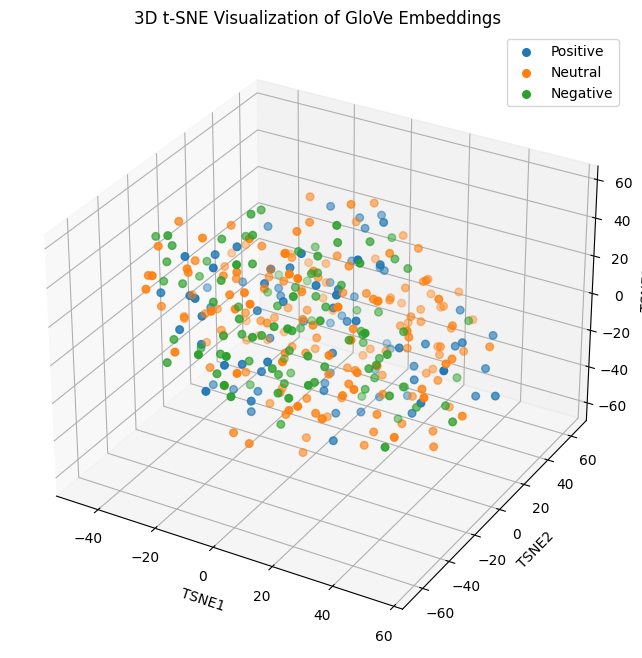

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler



# Standardize the data
scaler = StandardScaler()
df_Glove_scaled = scaler.fit_transform(df_Glove)

# Apply t-SNE to reduce the dimensionality to 3 components
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(df_Glove_scaled)

# Convert the t-SNE results to a DataFrame
df_tsne_glove = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2', 'TSNE3'])

# Define sentiment categories and label mappings
categories = ['Positive', 'Neutral', 'Negative']
labels_map = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}

# Create a 3D plot using matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each sentiment category
for label in [1, 0, -1]:
    sub_matrix = df_tsne_glove[stock_data['Label'] == label].to_numpy()
    x = sub_matrix[:, 0]
    y = sub_matrix[:, 1]
    z = sub_matrix[:, 2]

    ax.scatter(x, y, z, label=labels_map[label], s=30)  # s=30 for marker size

# Update axis titles
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
ax.set_title('3D t-SNE Visualization of GloVe Embeddings')

# Add legend
ax.legend()

# Show the plot
plt.show()


**Observations:**
- The plot suggests that the glove embeddings for these categories share similarities in the vector space, which may indicate that the contextual information between sentiments isn’t strongly distinct within the text data.

#### **Let's try google/flan-t5-large tokenizer**

- The **T5 (Text-To-Text Transfer Transformer)** architecture, including **FLAN-T5**, is a sequence-to-sequence (seq2seq) model, which means it has both an encoder and a decoder.
- The **T5Tokenizer from the Hugging Face library**, used with models like **google/flan-t5-large**, is a **sequence-level transformer** rather than a sentence transformer. It breaks text into subword tokens, meaning it will tokenize words into smaller pieces where necessary, which is typical for transformer-based models like T5.

In [72]:
from transformers import T5Tokenizer, T5Model, T5EncoderModel
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# initializing a T5 tokenizer using the pre-trained model
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")
model = T5EncoderModel.from_pretrained("google/flan-t5-large").to(device)  # Use T5EncoderModel since we just want embeddings

# model = T5Model.from_pretrained("google/flan-t5-large").to(device) # this one has Encoder and Decoder


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

**Understanding the Embeddings**
- The outputs.last_hidden_state will give you the embeddings for each token in the input sequence.
- This tensor will have the shape **(batch_size, sequence_length, hidden_size)**

where:
- **batch_size:** Number of input sequences (i.e., news articles).
- **sequence_length:** Number of tokens in the input sequence (after padding/truncation).
- **hidden_size:** The dimension of the hidden state (1024 for T5-large).

In [73]:
news_list = stock_data['News'].tolist()
T5_tokens = tokenizer(news_list, return_tensors="pt", padding=True, truncation=True).input_ids.to(device)



# Pass the tokenized inputs through the model to get the embeddings
with torch.no_grad(): # don't store gradients, because we not training, only doing inferencing
    outputs = model(input_ids=T5_tokens)
    T5_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy() # mean pooling

In [74]:
type(outputs)

transformers.modeling_outputs.BaseModelOutputWithPastAndCrossAttentions

In [75]:
outputs.last_hidden_state.ndim

3

- last_hidden_state has 3 dimensions

In [76]:
outputs.last_hidden_state.shape

torch.Size([349, 79, 1024])

**Observations:**
- 349 news articles
- 79 tokens in the input sequence (after padding/truncation)
- 1024 embedding size

In [77]:
T5_embeddings.shape

(349, 1024)

**Observations:**
- there are 349 rows and each row has 1024 columns

**Now viewing the embeddings for the 1st News Article**

In [78]:
T5_embeddings[0]

array([ 0.00893155,  0.0039601 ,  0.00798708, ...,  0.0352386 ,
       -0.01963461, -0.00078509], dtype=float32)

**Now let's make a pandas df out of these embeddings**

In [79]:
# create a df called T5_embeddings out of the embeddings.

# Creating column names as F1, F2, ..., F1023
columns = [f'F{i}' for i in range(1, 1025)]

# Converting the embeddings into a pandas DataFrame
df_T5 = pd.DataFrame(T5_embeddings, columns=columns)


In [80]:
df_T5.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F1015,F1016,F1017,F1018,F1019,F1020,F1021,F1022,F1023,F1024
0,0.008932,0.003960,0.007987,0.010048,0.027409,-0.036453,0.025931,0.028568,0.010276,-0.046817,...,0.038528,0.023164,-0.025094,-0.006340,0.028741,0.005171,0.011596,0.035239,-0.019635,-0.000785
1,0.036359,0.016338,-0.033125,0.017841,0.038849,-0.032820,0.015607,0.030063,-0.000989,-0.034137,...,0.034610,0.044623,-0.034284,-0.016750,0.017700,-0.014147,-0.007883,0.025554,-0.031764,-0.003082
2,0.039038,0.032041,-0.010591,0.028817,0.026675,-0.027311,0.010972,0.019758,0.025726,-0.003211,...,0.075005,0.030885,-0.026426,-0.003993,0.021462,0.019642,0.014303,0.017576,-0.032018,0.022709
3,0.027351,-0.001242,0.032248,0.008473,0.019426,-0.050504,0.030262,-0.000398,-0.004130,0.003358,...,0.052910,0.009736,-0.019922,-0.009691,0.042665,0.031449,0.021488,0.008480,-0.018201,0.000967
4,0.037756,0.023142,-0.036156,0.012393,0.030711,-0.013699,0.028816,0.003397,0.034085,-0.031023,...,0.028194,0.038695,-0.034125,-0.000446,0.025315,0.015721,0.000760,0.026696,-0.033701,0.009660


In [81]:
# save the df
df_T5.to_csv('df_T5.csv', index=False)

In [82]:
# load the df
df_T5 = pd.read_csv('df_T5.csv')

#### **Let's visualize the principal components for the T5 Features**

In [83]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize the data
scaler = StandardScaler()
df_T5_scaled = scaler.fit_transform(df_T5)


# Apply t-SNE to reduce the dimensionality to 3 components
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(df_T5_scaled)  # df_TF contains the T3 embeddings

# Convert the t-SNE results to a DataFrame
df_tsne_T5 = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2', 'TSNE3'])


# Check the results
display(df_tsne_T5.head())


,TSNE1,TSNE2,TSNE3
0,10.962634,-10.869448,1.881089
1,14.608538,-16.055429,7.956007
2,7.412251,6.439593,18.340136
3,13.226018,7.496235,-6.769445
4,17.743465,-17.238586,4.099801


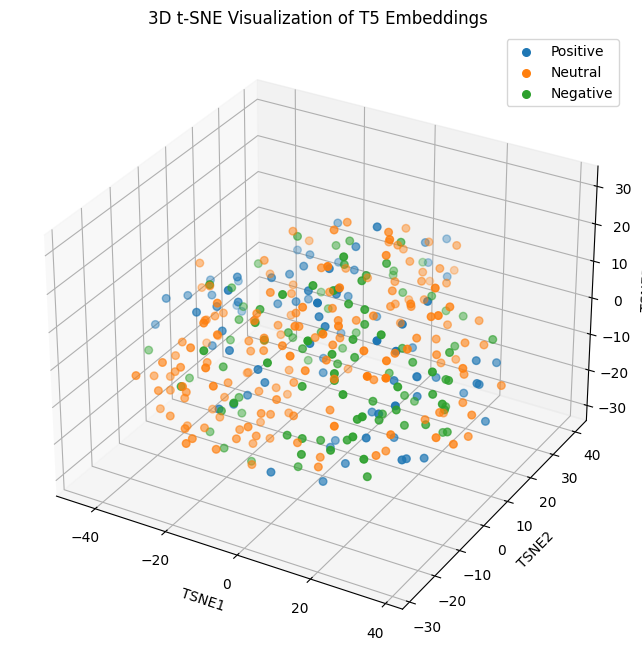

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler



# Standardize the data
scaler = StandardScaler()
df_T5_scaled = scaler.fit_transform(df_T5)

# Apply t-SNE to reduce the dimensionality to 3 components
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(df_T5_scaled)

# Convert the t-SNE results to a DataFrame
df_tsne_T5 = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2', 'TSNE3'])

# Define sentiment categories and label mappings
categories = ['Positive', 'Neutral', 'Negative']
labels_map = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}

# Create a 3D plot using matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each sentiment category
for label in [1, 0, -1]:
    sub_matrix = df_tsne_T5[stock_data['Label'] == label].to_numpy()
    x = sub_matrix[:, 0]
    y = sub_matrix[:, 1]
    z = sub_matrix[:, 2]

    ax.scatter(x, y, z, label=labels_map[label], s=30)  # s=30 for marker size

# Update axis titles
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
ax.set_title('3D t-SNE Visualization of T5 Embeddings')

# Add legend
ax.legend()

# Show the plot
plt.show()


**Observations:**
- The plot suggests that the T5 embeddings for these categories share similarities in the vector space, which may indicate that the contextual information between sentiments isn’t strongly distinct within the text data.

## **Sentiment Analysis**

#### **Function to plot confusion Matrix**

In [85]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = ['negative', 'neutral', 'positive']
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Using Word2Vec analysis

In [86]:
for i, column in enumerate(stock_data.columns, 1):
    print(f"{i}. {column}")

1. Date
2. News
3. News_processed
4. Open
5. High
6. Low
7. Close
8. Volume
9. Label
10. news_length
11. Day_of_Week
12. Month_of_Year


In [87]:
stock_data.shape

(349, 12)

In [88]:
df_Word2Vec.shape

(349, 300)

#### **Let's combine all the features to a new dataframe**

In [89]:
# One-hot encode the Day_of_Week and Month_of_Year columns
stock_data_encoded = pd.get_dummies(stock_data[['Day_of_Week', 'Month_of_Year']])



# concanetate the original data fields, df_Word2Vec and stock_data_encoded
df_combined_w2v = pd.concat([stock_data[['Open', 'High', 'Low', 'Close', 'Volume']],
                         df_Word2Vec,
                         stock_data_encoded
                         ], axis=1)


df_combined_glove = pd.concat([stock_data[['Open', 'High', 'Low', 'Close', 'Volume']],
                         df_Glove,
                         stock_data_encoded
                         ], axis=1)


df_combined_T5 = pd.concat([stock_data[['Open', 'High', 'Low', 'Close', 'Volume']],
                         df_T5,
                         stock_data_encoded
                         ], axis=1)



# Features: All the columns except 'Label'
Xw2v = df_combined_w2v
Xglove = df_combined_glove
XT5 = df_combined_T5

# Target: Sentiment labels
y = stock_data['Label']

print(f"\n W2v:")
display(Xw2v.shape)  # This should now have additional columns for Day_of_Week and Month_of_Year
display(Xw2v.columns)  # Check the new columns

print(f"\n glove:")
display(Xglove.shape)  # This should now have additional columns for Day_of_Week and Month_of_Year
display(Xglove.columns)  # Check the new columns

print(f"\n T5:")
display(XT5.shape)  # This should now have additional columns for Day_of_Week and Month_of_Year
display(XT5.columns)
print()



 W2v:


(349, 314)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Feature 0', 'Feature 1',
       'Feature 2', 'Feature 3', 'Feature 4',
       ...
       'Feature 299', 'Day_of_Week_Friday', 'Day_of_Week_Monday',
       'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday',
       'Month_of_Year_April', 'Month_of_Year_February',
       'Month_of_Year_January', 'Month_of_Year_March'],
      dtype='object', length=314)


 glove:


(349, 114)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Feature 0', 'Feature 1',
       'Feature 2', 'Feature 3', 'Feature 4',
       ...
       'Feature 99', 'Day_of_Week_Friday', 'Day_of_Week_Monday',
       'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday',
       'Month_of_Year_April', 'Month_of_Year_February',
       'Month_of_Year_January', 'Month_of_Year_March'],
      dtype='object', length=114)


 T5:


(349, 1038)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'F1', 'F2', 'F3', 'F4', 'F5',
       ...
       'F1024', 'Day_of_Week_Friday', 'Day_of_Week_Monday',
       'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday',
       'Month_of_Year_April', 'Month_of_Year_February',
       'Month_of_Year_January', 'Month_of_Year_March'],
      dtype='object', length=1038)

#### **split the data into train, test**

**using all features combined: w2v + price + Day_of_week + Month of_year**
- For ensemble methods having a separate validation set does not add much value, since gridsearch CV does the validation with k-fold cross validation

In [90]:
# First, split into training+validation (80%) and test (20%) sets
Xw2v_train, Xw2v_test, yw2v_train, yw2v_test = train_test_split(Xw2v, y, test_size=0.2,
                                                            random_state=42, shuffle=True, stratify=y)

# Output the shape of each split to verify
print("Training set size:", Xw2v_train.shape)
print("Test set size:", Xw2v_test.shape)

Training set size: (279, 314)
Test set size: (70, 314)


In [91]:
# Checking class balance for whole data, train set, validation set, and test set

y_data_list = ['y', 'yw2v_train','yw2v_test']

# Loop to check class balance
for data_name in y_data_list:
    data_set = eval(data_name)
    print(f"Target value ratio in {data_name}:")
    print(f"Data Set Name: {data_set.value_counts(normalize=True)} \n{'-'*80}")

Target value ratio in y:
Data Set Name: Label
 0    0.487106
-1    0.283668
 1    0.229226
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------
Target value ratio in yw2v_train:
Data Set Name: Label
 0    0.487455
-1    0.283154
 1    0.229391
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------
Target value ratio in yw2v_test:
Data Set Name: Label
 0    0.485714
-1    0.285714
 1    0.228571
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------


**Observation:**
- Stratify worked, since the propotion of sentiments are the same in every data set

#### **OverSampling to resolve class imbalance**

**Oversampling**

1. **Understanding Class Imbalance**

In many real-world datasets, the class distribution is imbalanced. This means that one class (usually the majority class) significantly outnumbers the other class (minority class). For example, in a fraud detection dataset, the number of fraudulent transactions is typically much smaller than the number of legitimate transactions.

2. **Why Address Class Imbalance?**

Class imbalance can lead to biased models that perform well on the majority class but poorly on the minority class. To mitigate this, techniques like undersampling and oversampling are used.

What is Oversampling?

- Oversampling involves **increasing the number of instances in the minority class** to balance the class distribution. This can be done by randomly duplicating samples from the minority class or by generating synthetic samples (e.g., using SMOTE).

Why Use Oversampling?

- Preserves All Majority Class Samples: Unlike undersampling, oversampling does not discard any majority class samples.
- Improves Model Performance: By balancing the class distribution, the model can learn the characteristics of both classes more effectively.

SMOTE:

- SMOTE: A technique to generate synthetic samples for the minority class to balance the dataset.
- Purpose: Address class imbalance, improve model performance, and avoid overfitting.
- Process: Identifies minority class instances, selects nearest neighbors, and generates synthetic samples by interpolation.
- Benefits: Leads to better generalization, improved recall, precision, and F1 scores, and more balanced model performance across classes.

Using SMOTE can significantly enhance the performance of machine learning models on imbalanced datasets by ensuring that the model learns effectively from both classes.

**Explanation of SMOTE Parameters**

- sampling_strategy=1

  - Purpose: Defines the desired balance between the minority and majority classes after resampling.
  - Value 1: This means the minority class will be resampled to have the same number of instances as the majority class. In other words, after applying SMOTE, the dataset will be perfectly balanced with a 1:1 ratio between the minority and majority classes.

- sampling_strategy='auto':
  - SMOTE will automatically resample the minority classes to match the size of the majority class.
- sampling_strategy={-1: 50, 0: 50, 1: 50}:
  - You can manually set the number of samples per class using a dictionary, specifying how many samples you want for each class.  

- k_neighbors=5

  - Purpose: Specifies the number of nearest neighbors to use when generating synthetic samples for the minority class.
  - Value 5: This means SMOTE will look for the 5 nearest neighbors of each minority class instance and create synthetic samples by interpolating between the instance and its neighbors.

Impact:

- Higher Values: Use more neighbors, leading to a smoother distribution of synthetic samples but potentially more overlap with the majority class.
- Lower Values: Use fewer neighbors, resulting in synthetic samples that are closer to the original minority instances but might not cover the feature space as well.  

In [92]:
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=1)

In [93]:
# Apply SMOTE to the training data
Xw2v_train_over, yw2v_train_over = sm.fit_resample(Xw2v_train, yw2v_train)

print("Original training dataset shape:", Xw2v_train.shape, yw2v_train.shape)
print("Resampled training dataset shape:", Xw2v_train_over.shape, yw2v_train_over.shape)

Original training dataset shape: (279, 314) (279,)
Resampled training dataset shape: (408, 314) (408,)


In [94]:
# Checking class balance for train set

y_data_list = ['yw2v_train_over']

# Loop to check class balance
for data_name in y_data_list:
    data_set = eval(data_name)
    print(f"Target value ratio in {data_name}:")
    print(f"Data Set Name: {data_set.value_counts(normalize=True)} \n{'-'*80}")

Target value ratio in yw2v_train_over:
Data Set Name: Label
 0    0.333333
 1    0.333333
-1    0.333333
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------


#### **Random Forest with Grid Search**
- using: Pre-Pruning with best parameters (using GSearchCV from sklearn library)

**Explanaton of some parameter values**

1.   **cv=5**

- The dataset is split into 5 parts (folds): Fold 1, Fold 2, Fold 3, Fold 4, Fold 5.

**Training & Validation**

- Iteration 1: Train on Fold 2, Fold 3, Fold 4, Fold 5; Validate on Fold 1.
- Iteration 2: Train on Fold 1, Fold 3, Fold 4, Fold 5; Validate on Fold 2.
- Iteration 3: Train on Fold 1, Fold 2, Fold 4, Fold 5; Validate on Fold 3.
- Iteration 4: Train on Fold 1, Fold 2, Fold 3, Fold 5; Validate on Fold 4.
- Iteration 5: Train on Fold 1, Fold 2, Fold 3, Fold 4; Validate on Fold 5.



2.   **n_jobs=-1**

- This parameter specifies the number of jobs (threads) to run in parallel for the grid search.
- n_jobs=-1 means that all available processors will be used. This can significantly speed up the computation, especially when the grid search is extensive with many combinations of hyperparameters.
- Utilizing multiple processors makes the grid search faster because it allows parallel computation, where multiple tasks are processed simultaneously.

3. **grid_search.fit(X_train, y_train)**
- training/fitting is always done on the training data
- we'll save the optimized model (based on recall score) as `best-estimator`


In [95]:
%%time
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report


# Choose the type of classifier.
# word2vec_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=42,bootstrap=True)
word2vec_rf_tuned = RandomForestClassifier(random_state=42,bootstrap=True)


parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(word2vec_rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1, verbose=1)
grid_obj = grid_obj.fit(Xw2v_train_over, yw2v_train_over)

# Fit the best algorithm to the data.
w2vec_best_rf = grid_obj.best_estimator_
w2vec_best_rf.fit(Xw2v_train_over, yw2v_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 2.76 s, sys: 348 ms, total: 3.11 s
Wall time: 24.5 s


RandomForestClassifier(max_depth=5, max_features=0.3, n_estimators=50,
                       random_state=42)

In [96]:
# save the model
import joblib
joblib.dump(w2vec_best_rf, 'w2vec_best_rf.pkl')


['w2vec_best_rf.pkl']

In [97]:

import joblib
# Load the model
w2vec_best_rf = joblib.load('w2vec_best_rf.pkl')


#### **Make Predictions on test set**


In [98]:

y_pred = w2vec_best_rf.predict(Xw2v_test)

# Accuracy
accuracy = accuracy_score(yw2v_test, y_pred)
print("Accuracy:", accuracy)

# Recall
recall = recall_score(yw2v_test, y_pred, average='macro')  # 'macro' averages recall across classes
print("Recall:", recall)

# Precision
precision = precision_score(yw2v_test, y_pred, average='macro')  # 'macro' averages precision across classes
print("Precision:", precision)

# F1-Score
f1 = f1_score(yw2v_test, y_pred, average='macro')  # 'macro' averages f1-score across classes
print("F1-Score:", f1)

print()


# Detailed Classification Report
print("Classification Report:\n", classification_report(yw2v_test, y_pred))

Accuracy: 0.42857142857142855
Recall: 0.3889705882352941
Precision: 0.3857142857142857
F1-Score: 0.3869211735595617

Classification Report:
               precision    recall  f1-score   support

          -1       0.43      0.45      0.44        20
           0       0.51      0.53      0.52        34
           1       0.21      0.19      0.20        16

    accuracy                           0.43        70
   macro avg       0.39      0.39      0.39        70
weighted avg       0.42      0.43      0.42        70



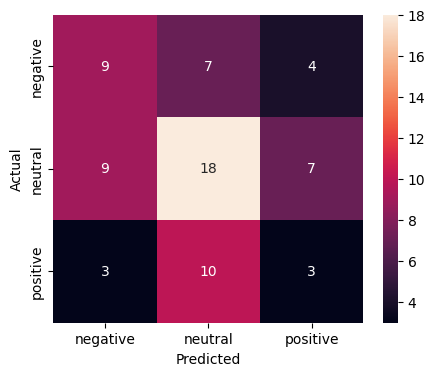

In [99]:
%matplotlib inline
plot_confusion_matrix(yw2v_test, y_pred)

#### **Now trying Random Forest w2vec with only News features**

In [100]:
# First, split into training+validation (80%) and test (20%) sets
Xw2vNews_train, Xw2vNews_test, yw2vNews_train, yw2vNews_test = train_test_split(df_Word2Vec, y, test_size=0.2,
                                                            random_state=42, shuffle=True, stratify=y)

# Output the shape of each split to verify
print("Training set size:", Xw2vNews_train.shape)
print("Test set size:", Xw2vNews_test.shape)

Training set size: (279, 300)
Test set size: (70, 300)


In [101]:
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=1)

In [102]:
# Apply SMOTE to the training data
Xw2vNews_train_over, yw2vNews_train_over = sm.fit_resample(Xw2vNews_train, yw2vNews_train)

print("Original training dataset shape:", Xw2vNews_train.shape, yw2vNews_train.shape)
print("Resampled training dataset shape:", Xw2vNews_train_over.shape, yw2vNews_train_over.shape)

Original training dataset shape: (279, 300) (279,)
Resampled training dataset shape: (408, 300) (408,)


In [103]:
%%time
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report


# Choose the type of classifier.
# word2vec_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=42,bootstrap=True)
word2vec_news = RandomForestClassifier(random_state=42,bootstrap=True)


parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(word2vec_news, parameters, scoring='recall',cv=5,n_jobs=-1, verbose=1)
grid_obj = grid_obj.fit(Xw2vNews_train_over, yw2vNews_train_over)

# Fit the best algorithm to the data.
w2vec_best_rf_newsOnly = grid_obj.best_estimator_
w2vec_best_rf_newsOnly.fit(Xw2vNews_train_over, yw2vNews_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 3.08 s, sys: 73.9 ms, total: 3.15 s
Wall time: 21.3 s


RandomForestClassifier(max_depth=5, max_features=0.3, n_estimators=50,
                       random_state=42)

In [104]:
# Save the model
import joblib
joblib.dump(w2vec_best_rf_newsOnly, 'w2vec_best_rf_newsOnly.pkl')



['w2vec_best_rf_newsOnly.pkl']

In [105]:
import joblib

# Load the model
w2vec_best_rf_newsOnly = joblib.load('w2vec_best_rf_newsOnly.pkl')

**Making Predictions on Test Set**

In [106]:
y_pred = w2vec_best_rf_newsOnly.predict(Xw2vNews_test)

# Accuracy
accuracy = accuracy_score(yw2vNews_test, y_pred)
print("Accuracy:", accuracy)

# Recall
recall = recall_score(yw2vNews_test, y_pred, average='macro')  # 'macro' averages recall across classes
print("Recall:", recall)

# Precision
precision = precision_score(yw2vNews_test, y_pred, average='macro')  # 'macro' averages precision across classes
print("Precision:", precision)

# F1-Score
f1 = f1_score(yw2vNews_test, y_pred, average='macro')  # 'macro' averages f1-score across classes
print("F1-Score:", f1)

print()


# Detailed Classification Report
print("Classification Report:\n", classification_report(yw2vNews_test, y_pred))


Accuracy: 0.44285714285714284
Recall: 0.4098039215686275
Precision: 0.42083333333333334
F1-Score: 0.4137869927343611

Classification Report:
               precision    recall  f1-score   support

          -1       0.50      0.45      0.47        20
           0       0.56      0.53      0.55        34
           1       0.20      0.25      0.22        16

    accuracy                           0.44        70
   macro avg       0.42      0.41      0.41        70
weighted avg       0.46      0.44      0.45        70



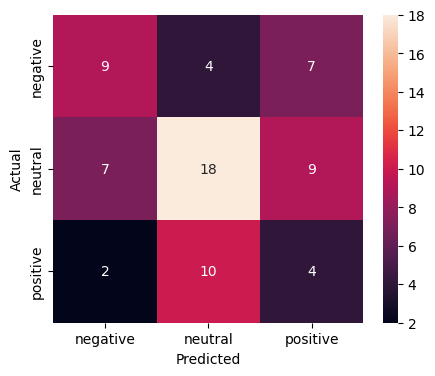

In [107]:
%matplotlib inline
plot_confusion_matrix(yw2vNews_test, y_pred)

**Observations:**

- Not much improvement.  Prediction is not much better than guessing
- Not anything different than what we expected from the t-sne plot

### Using Glove analysis

In [108]:
# First, split into training+validation (80%) and test (20%) sets
Xglove_train, Xglove_test, yglove_train, yglove_test = train_test_split(Xglove, y, test_size=0.2,
                                                            random_state=42, shuffle=True, stratify=y)

# Output the shape of each split to verify
print("Training set size:", Xglove_train.shape)
print("Test set size:", Xglove_test.shape)

Training set size: (279, 114)
Test set size: (70, 114)


In [109]:
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=1)

In [110]:
# Apply SMOTE to the training data
Xglove_train_over, yglove_train_over = sm.fit_resample(Xglove_train, yglove_train)

print("Original training dataset shape:", Xglove_train.shape, yglove_train.shape)
print("Resampled training dataset shape:", Xglove_train_over.shape, yglove_train_over.shape)



Original training dataset shape: (279, 114) (279,)
Resampled training dataset shape: (408, 114) (408,)


In [111]:
%%time
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report


# Choose the type of classifier.
# word2vec_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=42,bootstrap=True)
glove_rf = RandomForestClassifier(random_state=42,bootstrap=True)


parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(glove_rf, parameters, scoring='recall',cv=5,n_jobs=-1, verbose=1)
grid_obj = grid_obj.fit(Xglove_train_over, yglove_train_over)

# Fit the best algorithm to the data.
glove_best_rf = grid_obj.best_estimator_
glove_best_rf.fit(Xglove_train_over, yglove_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 1.24 s, sys: 31.2 ms, total: 1.27 s
Wall time: 9.64 s


RandomForestClassifier(max_depth=5, max_features=0.3, n_estimators=50,
                       random_state=42)

In [112]:
# save the model
import joblib
joblib.dump(glove_best_rf, 'glove_best_rf.pkl')

['glove_best_rf.pkl']

In [113]:
import joblib
# load the model
glove_best_rf = joblib.load('glove_best_rf.pkl')

#### **Make Predictions on test set for Glove Model**

In [114]:
y_pred = glove_best_rf.predict(Xglove_test)

# Accuracy
accuracy = accuracy_score(yglove_test, y_pred)
print("Accuracy:", accuracy)

# Recall
recall = recall_score(yglove_test, y_pred, average='macro')  # 'macro' averages recall across classes
print("Recall:", recall)

# Precision
precision = precision_score(yglove_test, y_pred, average='macro')  # 'macro' averages precision across classes
print("Precision:", precision)

# F1-Score
f1 = f1_score(yglove_test, y_pred, average='macro')  # 'macro' averages f1-score across classes
print("F1-Score:", f1)

print()


# Detailed Classification Report
print("Classification Report:\n", classification_report(yglove_test, y_pred))

Accuracy: 0.44285714285714284
Recall: 0.453921568627451
Precision: 0.4365079365079365
F1-Score: 0.44102324196738046

Classification Report:
               precision    recall  f1-score   support

          -1       0.43      0.45      0.44        20
           0       0.50      0.41      0.45        34
           1       0.38      0.50      0.43        16

    accuracy                           0.44        70
   macro avg       0.44      0.45      0.44        70
weighted avg       0.45      0.44      0.44        70



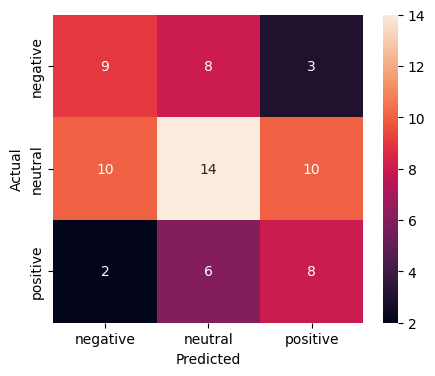

In [115]:
plot_confusion_matrix(yglove_test, y_pred)

#### **Now trying Random Forest glove with only News features**

In [116]:
# First, split into training+validation (80%) and test (20%) sets
XgloveNews_train, XgloveNews_test, ygloveNews_train, ygloveNews_test = train_test_split(df_Glove, y, test_size=0.2,
                                                            random_state=42, shuffle=True, stratify=y)

# Output the shape of each split to verify
print("Training set size:", XgloveNews_train.shape)
print("Test set size:", XgloveNews_test.shape)

Training set size: (279, 100)
Test set size: (70, 100)


In [117]:
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=1)

In [118]:
# Apply SMOTE to the training data
XgloveNews_train_over, ygloveNews_train_over = sm.fit_resample(XgloveNews_train, ygloveNews_train)

print("Original training dataset shape:", XgloveNews_train.shape, ygloveNews_train.shape)
print("Resampled training dataset shape:", XgloveNews_train_over.shape, ygloveNews_train_over.shape)

Original training dataset shape: (279, 100) (279,)
Resampled training dataset shape: (408, 100) (408,)


In [119]:
%%time
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report


# Choose the type of classifier.
# word2vec_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=42,bootstrap=True)
glove_news = RandomForestClassifier(random_state=42,bootstrap=True)


parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(word2vec_news, parameters, scoring='recall',cv=5,n_jobs=-1, verbose=1)
grid_obj = grid_obj.fit(XgloveNews_train_over, ygloveNews_train_over)

# Fit the best algorithm to the data.
glove_best_rf_newsOnly = grid_obj.best_estimator_
glove_best_rf_newsOnly.fit(XgloveNews_train_over, ygloveNews_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 1.14 s, sys: 37.4 ms, total: 1.18 s
Wall time: 8.66 s


RandomForestClassifier(max_depth=5, max_features=0.3, n_estimators=50,
                       random_state=42)

In [120]:
# save the model
import joblib
joblib.dump(glove_best_rf_newsOnly, 'glove_best_rf_newsOnly.pkl')

['glove_best_rf_newsOnly.pkl']

In [121]:
import joblib
# load the model
glove_best_rf_newsOnly = joblib.load('glove_best_rf_newsOnly.pkl')


**Make Predictions on Test Set**

In [122]:
y_pred = glove_best_rf_newsOnly.predict(XgloveNews_test)

# Accuracy
accuracy = accuracy_score(ygloveNews_test, y_pred)
print("Accuracy:", accuracy)

# Recall
recall = recall_score(ygloveNews_test, y_pred, average='macro')  # 'macro' averages recall across classes
print("Recall:", recall)

# Precision
precision = precision_score(ygloveNews_test, y_pred, average='macro')  # 'macro' averages precision across classes
print("Precision:", precision)

# F1-Score
f1 = f1_score(ygloveNews_test, y_pred, average='macro')  # 'macro' averages f1-score across classes
print("F1-Score:", f1)

print()


# Detailed Classification Report
print("Classification Report:\n", classification_report(ygloveNews_test, y_pred))


Accuracy: 0.4
Recall: 0.4245098039215686
Precision: 0.4000000000000001
F1-Score: 0.4057752667922159

Classification Report:
               precision    recall  f1-score   support

          -1       0.36      0.45      0.40        20
           0       0.44      0.32      0.37        34
           1       0.40      0.50      0.44        16

    accuracy                           0.40        70
   macro avg       0.40      0.42      0.41        70
weighted avg       0.41      0.40      0.40        70



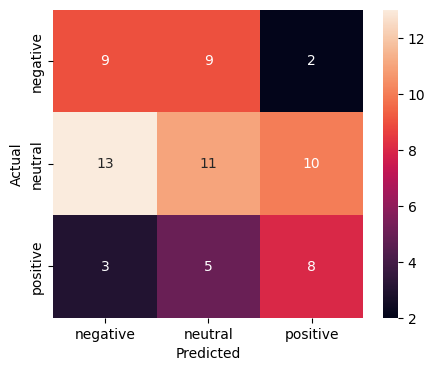

In [123]:
%matplotlib inline
plot_confusion_matrix(ygloveNews_test, y_pred)

**Observations:**

- Not much improvement.  Prediction is not much better than guessing
- Not anything different than what we expected from the t-sne plot

### Using T5 analysis with all data (combined data)

In [124]:
# First, split into training+validation (80%) and test (20%) sets
XT5_train, XT5_test, yT5_train, yT5_test = train_test_split(XT5, y, test_size=0.2,
                                                            random_state=42, shuffle=True, stratify=y)

# Output the shape of each split to verify
print("Training set size:", XT5_train.shape)
print("Test set size:", XT5_test.shape)

Training set size: (279, 1038)
Test set size: (70, 1038)


In [125]:
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=1)

In [126]:
# Apply SMOTE to the training data
XT5_train_over, yT5_train_over = sm.fit_resample(XT5_train, yT5_train)


print("Original training dataset shape:", XT5_train.shape, yT5_train.shape)
print("Resampled training dataset shape:", XT5_train_over.shape, yT5_train_over.shape)



Original training dataset shape: (279, 1038) (279,)
Resampled training dataset shape: (408, 1038) (408,)


In [127]:
%%time
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report


# Choose the type of classifier.
# word2vec_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=42,bootstrap=True)
T5_rf = RandomForestClassifier(random_state=42,bootstrap=True)


parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(T5_rf, parameters, scoring='recall',cv=5,n_jobs=-1, verbose=1)
grid_obj = grid_obj.fit(XT5_train_over, yT5_train_over)

# Fit the best algorithm to the data.
T5_best_rf = grid_obj.best_estimator_
T5_best_rf.fit(XT5_train_over, yT5_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 8.39 s, sys: 162 ms, total: 8.56 s
Wall time: 1min 6s


RandomForestClassifier(max_depth=5, max_features=0.3, n_estimators=50,
                       random_state=42)

In [128]:
# save the model
import joblib
joblib.dump(T5_best_rf, 'T5_best_rf.pkl')

['T5_best_rf.pkl']

In [129]:
# load the model
import joblib

T5_best_rf = joblib.load('T5_best_rf.pkl')


#### **Make Predictions on test set for T5 Model**

In [130]:
y_pred = T5_best_rf.predict(XT5_test)

# Accuracy
accuracy = accuracy_score(yT5_test, y_pred)
print("Accuracy:", accuracy)

# Recall
recall = recall_score(yT5_test, y_pred, average='macro')  # 'macro' averages recall across classes
print("Recall:", recall)

# Precision
precision = precision_score(yT5_test, y_pred, average='macro')  # 'macro' averages precision across classes
print("Precision:", precision)

# F1-Score
f1 = f1_score(yT5_test, y_pred, average='macro')  # 'macro' averages f1-score across classes
print("F1-Score:", f1)

print()


# Detailed Classification Report
print("Classification Report:\n", classification_report(yT5_test, y_pred))

Accuracy: 0.4142857142857143
Recall: 0.3737745098039216
Precision: 0.37767094017094016
F1-Score: 0.3736354560481825

Classification Report:
               precision    recall  f1-score   support

          -1       0.31      0.25      0.28        20
           0       0.49      0.56      0.52        34
           1       0.33      0.31      0.32        16

    accuracy                           0.41        70
   macro avg       0.38      0.37      0.37        70
weighted avg       0.40      0.41      0.41        70



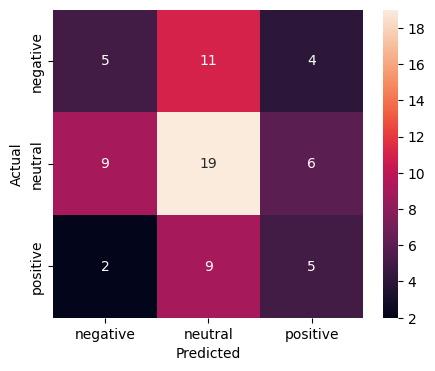

In [131]:
plot_confusion_matrix(yT5_test, y_pred)

**Observations:**

- Not much improvement.  Prediction is not much better than guessing
- Not anything different than what we expected from the t-sne plot

---

#### **Let's try a pre-built sentiment analysis model from Hugging Face**

- we'll use Hugging Face: **all-MiniLM-L6-v2** to encode the News articles
- we'll use k-means  clustering to verify that there are indeed 3 categories, Negative, Neutral and Positive
- we'll then use Hugging Face "**zero-shot-classification**" to categorize it appropriately
- Finally we'll do a classification report and a confusion matrix to see results

In [132]:
stock_data.head(1)

,Date,News,News_processed,Open,High,Low,Close,Volume,Label,news_length,Day_of_Week,Month_of_Year
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",tech sector experienc signific declin aftermarket follow appl q1 revenu warn notabl supplier includ skywork broadcom lumentum qorvo tsmc saw stock drop respons appl downward revis revenu expect quarter previous announc januari,41.740002,42.244999,41.482498,40.246914,130672400,-1,324,Wednesday,January


#### initiate the pre-trained model

In [133]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### Encode the News Articles

SentenceTransformer model (sentence-transformers/all-MiniLM-L6-v2) is based on transformers like BERT, and these models generally do not require traditional preprocessing (e.g., lowercasing, stopword removal, stemming) in the same way that models like Word2Vec do.

In [134]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [135]:
# encoding the dataset
embedding_matrix = model.encode(stock_data['News'], show_progress_bar=True, device=device)

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

In [136]:
# printing the shape of the embedding matrix
print(f"News shape {stock_data['News'].shape}")
print(f"embedding_matrix.shape: {embedding_matrix.shape}")

News shape (349,)
embedding_matrix.shape: (349, 384)


- Each news article has been converted to a 384-dimensional vector

**viewing the 1st 10 values of matrix for 1st News Article**

In [137]:
embedding_matrix[0][:10]

array([-0.00202309, -0.03677354,  0.07735426,  0.04671341,  0.03255213,
        0.00210231,  0.04328347,  0.03953449,  0.05822799,  0.00887513],
      dtype=float32)

**Query/Similarity Search**

In [138]:
# defining a function to find the top k similar sentences for a given query
def top_k_similar_sentences(embedding_matrix, query_text, k):
    # encoding the query text
    query_embedding = model.encode(query_text)

    # calculating the cosine similarity between the query vector and all other encoded vectors of our dataset
    score_vector = np.dot(embedding_matrix,query_embedding)

    # sorting the scores in descending order and choosing the first k
    top_k_indices = np.argsort(score_vector)[::-1][:k] # [::1] means turn ascending to descending.  [:k], select the first k elements

    # returning the corresponding reviews
    return data.loc[list(top_k_indices), 'News'] # News is my stock_data column

In [139]:
# defining the query text
query_text = "terrible stock performance"

# displaying the top 5 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 5)


for i, reviews in  enumerate(top_k_reviews, 1):
    print(f" review: {i} \n reviews:\n {reviews}")

 review: 1 
 reviews:
  In mixed trading on Wall Street, disappointing earnings from Google pressured tech stocks, while positive numbers from Dow components supported bulls. The Dow Jones rose 0.1%, S&P 500 fell 0.2%, and Nasdaq Composite dropped 0.5%. Google parent Alphabet reported its slowest revenue
 review: 2 
 reviews:
  The U.S stock market saw a mixed performance on Monday, with the S&P 500 and Nasdaq Composite posting small losses while the Dow Jones Industrial Average eked out gains. Falling U.S government bond yields kept recession fears alive, despite analysts' upbeat outlook on global growth. Goldman
 review: 3 
 reviews:
  Wall Street saw modest gains on Wednesday but were threatened by fears of a global economic slowdown following Apple's shocking revenue forecast cut, blaming weak demand in China. The tech giant's suppliers and S&P 500 futures also suffered losses. Reports of decelerating factory activity in China and the euro zone
 review: 4 
 reviews:
  IBM, Procter 

**Next we will use K-Means Clustering to find the distance between the embedding vectors and try to make 9 clusters out of it**

In [140]:
from sklearn.cluster import KMeans

# to compute distances
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

meanDistortions = []
clusters = range(2, 11)

for k in clusters:
    clusterer = KMeans(n_clusters=k, random_state=1)
    clusterer.fit(embedding_matrix)

    prediction = clusterer.predict(embedding_matrix) # not used in this code

    distortion = sum(
        np.min(cdist(embedding_matrix, clusterer.cluster_centers_, "euclidean"), axis=1) ** 2
    )
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 2 	Average Distortion: 257.79870894541773
Number of Clusters: 3 	Average Distortion: 252.04996061283651
Number of Clusters: 4 	Average Distortion: 244.17820823392614
Number of Clusters: 5 	Average Distortion: 242.6606026491151
Number of Clusters: 6 	Average Distortion: 235.30653992771252
Number of Clusters: 7 	Average Distortion: 232.08863033023903
Number of Clusters: 8 	Average Distortion: 229.04524331324362
Number of Clusters: 9 	Average Distortion: 226.1546772443507
Number of Clusters: 10 	Average Distortion: 223.42289024125986


**Making elbow curve**

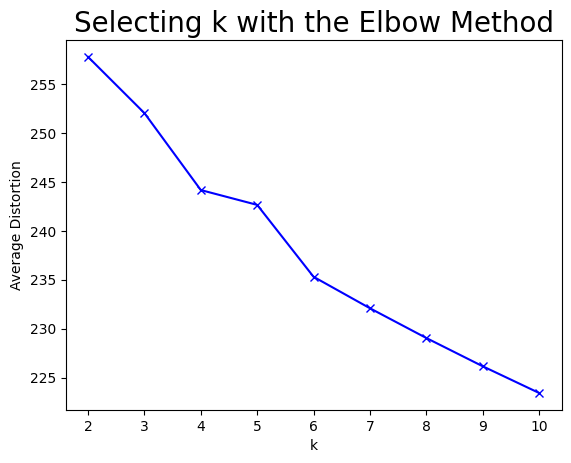

In [141]:
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**silhouette graph**

In [142]:
sil_score = []
cluster_list = range(2, 10)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    preds = clusterer.fit_predict((embedding_matrix))

    score = silhouette_score(embedding_matrix, preds)
    sil_score.append(score)

    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.060745079070329666)
For n_clusters = 3, the silhouette score is 0.05091123282909393)
For n_clusters = 4, the silhouette score is 0.042807891964912415)
For n_clusters = 5, the silhouette score is 0.0324106365442276)
For n_clusters = 6, the silhouette score is 0.03893193230032921)
For n_clusters = 7, the silhouette score is 0.041014619171619415)
For n_clusters = 8, the silhouette score is 0.04105759784579277)
For n_clusters = 9, the silhouette score is 0.03440580889582634)


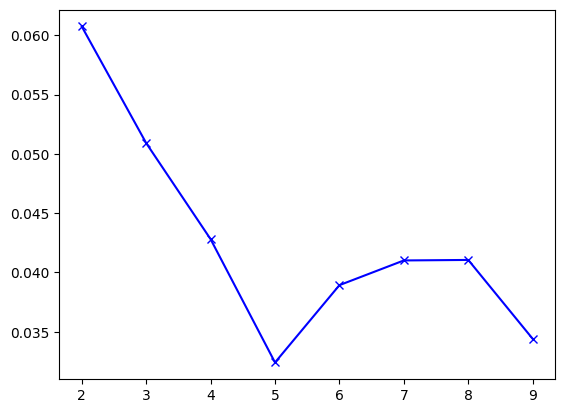

In [143]:
plt.plot(cluster_list, sil_score, "bx-") # b: blue, x is the marker ( o: circle, s: square, d: diamond, +: plus), - is solid line
plt.show()

**Observations:**
- obviously the clustering is best at 2
- however since we still have to classify as negative, neutral and positive, we'll use 3 clusters, but the classification won't be too good, because there will be ovelap


**Let's fit the model to 3 clusters**

In [144]:
# defining the number of clusters/categories
n_categories = 3

# fitting the model
kmeans = KMeans(n_clusters=n_categories, random_state=1).fit(embedding_matrix) # remember: embedding_matrix = model.encode(data['Text'], show_progress_bar=True, device=device) and model was SentenceTransformer/...

In [145]:
# checking the cluster centers
centers = kmeans.cluster_centers_
centers

array([[-0.02049273, -0.00823878,  0.0415399 , ..., -0.0869962 ,
         0.03591416,  0.04291191],
       [ 0.00304195, -0.01600422,  0.04685842, ..., -0.10664248,
        -0.02345445,  0.05932623],
       [-0.01890732, -0.00483673,  0.02671998, ..., -0.04782848,
         0.03620531,  0.01616416]], dtype=float32)

In [146]:
kmeans.labels_

array([1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0,
       1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1,
       2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2,
       0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2,
       1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1,
       0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0,
       2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2,
       0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0,

In [147]:
kmeans.cluster_centers_.shape

(3, 384)

**3 cluster centers of 384 embeddings in each**

In [148]:
kmeans.labels_.shape

(349,)

In [149]:
data['News'].shape

(349,)

**there are 349 news articles and each news article got assigned to a cluster (label 0, 1, 2)**

**Now let's make a data frame which includes news and the kmeans cluster value**

In [150]:
# create a df with news, label and k-means cluster value
kmeans_df = pd.DataFrame(data['News'])
kmeans_df ['Label'] = stock_data['Label']
kmeans_df['K-M_Label'] = kmeans.labels_
kmeans_df.head()

,News,Label,K-M_Label
0,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",-1,1
1,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",-1,0
2,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",-1,1
3,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",-1,1
4,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",-1,1


**Now let's try to find out what K-M_label maps to what category: Negative, Neutral, Positive**

In [151]:
# for each cluster, printing the 5 random news articles
for i in range(3):
    print(f"K-M_Label: {i}")
    print(kmeans_df.loc[kmeans_df['K-M_Label'] == i, 'News'].sample(5, random_state=42).values)
    print("\n")

K-M_Label: 0
[" This week, the European Union's second highest court will rule on a Belgian tax break that reportedly benefited over 35 large companies, including Apple, Starbucks, Fiat Chrysler, and others. The European Commission ordered Belgium to recover around €790 million from these firms for allegedly providing an unfair advantage"
 ' Corning defied the trend of weak results in the phone and chip industry, reporting higher-than-expected revenue and profit for Q4. The surge in demand from telecom companies investing in 5G networks led to a 26% increase in sales for its optical communications division, which is on track to exceed its 202'
 ' The Lynx Equity Strategies analysts, KC Rajkumar and Jahanara Nissar, have reported hearing rumors that Apple may be considering cutting back on its self-driving vehicle program. This potential reversal could impact Services segment as the loss of this new growth vector might indicate stagnating iPhone sales, leading'
 " Amazon is launching it

**Now use hugging Face zero-shot classifier to find out the category meaning for 0, 1, 2**


In [152]:
from transformers import pipeline

# Initialize the zero-shot-classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", clean_up_tokenization_spaces="True", multi_label=True, device=device) # device was defined earlier to be cuda or not


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

**Sample one text from each of the 3 clusters and find out what sentiment is assigned to them**

In [153]:
import json

# Initialize the dictionary to store the results
category_dict = {}

# Sample one text from each of the 3 clusters and store them in a list
sampled_texts = []
for i in range(3):
    text = kmeans_df.loc[kmeans_df['K-M_Label']== i, 'News'].sample(1, random_state=42).values[0]
    sampled_texts.append(text)

# Candidate labels (categories you want to classify into)
candidate_labels = ["Negative", "Neutral", "Positive"]

# Perform zero-shot classification on all sampled texts at once
result = classifier(sampled_texts, candidate_labels)



# Iterate over the results and store the highest scoring label for each cluster
for i in range(3):
    # Get the dictionary containing 'labels' and 'scores' for the current text
    current_result = result[i]


    # Find the index of the maximum score for the current text
    max_value_index = current_result['scores'].index(max(current_result['scores']))

    # Get the label with the highest score
    predicted_label = current_result['labels'][max_value_index]

    # Store the result in the dictionary with the cluster number as key
    category_dict[i] = predicted_label

# Print the resulting dictionary in JSON format
# print(json.dumps(category_dict, indent=4))
category_dict


{0: 'Negative', 1: 'Positive', 2: 'Negative'}

In [154]:
for key, value in category_dict.items():
    print(f"K-Means Cluster: {key}\nzero-shot Sentiment assigned to News Article: {value}\nNews Article: \n {sampled_texts[key]} \n\n")

K-Means Cluster: 0
zero-shot Sentiment assigned to News Article: Negative
News Article: 
  This week, the European Union's second highest court will rule on a Belgian tax break that reportedly benefited over 35 large companies, including Apple, Starbucks, Fiat Chrysler, and others. The European Commission ordered Belgium to recover around €790 million from these firms for allegedly providing an unfair advantage 


K-Means Cluster: 1
zero-shot Sentiment assigned to News Article: Positive
News Article: 
  Viacom's stock surged 8.04% in premarket trade on Monday following the renewal of its contract with AT&T, preventing a blackout of MTV, Nickelodeon, and Comedy Central for DirecTV users. Nike faced a 1.37% decline due to a  


K-Means Cluster: 2
zero-shot Sentiment assigned to News Article: Negative
News Article: 
  In an internal memo, Huawei's Chen Lifang reprimanded two employees for sending a New Year greeting on the company's official Twitter account using an iPhone instead of a Hu

**Observations:**

- by the above code we pulled 3 different random samples from each K-Means cluster assignment and then compared the labels assigned to them by Hugging Face zero-shot classifier.
  - results: {0: 'Negative', 1: 'Positive', 2: 'Negative'}
- we also display the 3 News Samples
- It is clear from the exercise above that using 3 K-Means cluster shows lots of overlap -- Cluster 0 and Cluster 2 both have negative articles
- cluster0 and cluster2 show both Negative Sentiment as analysed by Hugging Face zero-shot

---

**Checking labels assigned by zero-shot**

In [155]:
data_list = data['News'].to_list()

In [156]:
data_list[:3]

[" The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",
 " Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",
 " Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon"]

In [157]:
len(data_list)

349

**Now checking  the "Neutral labels" from News articles and comparing them to Labels assigned by zero-shot classifier**
- also print out the results, for the 1st 10 articles, so we get to see the trend

In [158]:
%%time

counter = 0

# data_list is the list of texts and data['Label'] is the DataFrame with 'Label' column
for news in range(len(data_list)):
    # Check if the label of the current news is 0
    if data['Label'].iloc[news] == 0:

        # Get the current text (news article)
        sampled_texts = data_list[news]

        # Candidate labels (categories you want to classify into)
        candidate_labels = ["Negative", "Neutral", "Positive"]

        # Perform zero-shot classification on the current news text
        result = classifier(sampled_texts, candidate_labels)

        # Find the index of the maximum score for the current text
        max_value_index = result['scores'].index(max(result['scores']))

        # Get the label with the highest score
        predicted_label = result['labels'][max_value_index]

        print(f"given label: {data['Label'].iloc[news]}, predicted label: {predicted_label}")

        counter += 1

        # Stop the print after given number of iterations
        if counter >= 10:
          break

# print(LH)


given label: 0, predicted label: Negative
given label: 0, predicted label: Negative
given label: 0, predicted label: Positive
given label: 0, predicted label: Negative
given label: 0, predicted label: Positive
given label: 0, predicted label: Negative
given label: 0, predicted label: Positive
given label: 0, predicted label: Negative


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


given label: 0, predicted label: Negative
given label: 0, predicted label: Positive
CPU times: user 843 ms, sys: 2.19 ms, total: 845 ms
Wall time: 837 ms


**Observations**
- Hugging Face zero-shot classification clearly does not match with the given
labels



**Let's make new labels from zero-shot and store them in a list called y_LH**

In [159]:
%%time

# Initialize the zero-shot-classification pipeline
# Collect all the texts
texts_to_classify = [data_list[news] for news in range(len(data_list))]

# Perform zero-shot classification
candidate_labels = ["Negative", "Neutral", "Positive"]
results = classifier(texts_to_classify, candidate_labels)

# Process the results
y_LH = [] # empty list for label results
for result in results:
    # Find the index of the maximum score
    max_value_index = result['scores'].index(max(result['scores']))

    # Get the label with the highest score
    predicted_label = result['labels'][max_value_index]
    y_LH.append(predicted_label)

# Now, y_LH contains the predicted labels for all the news articles
print(f"Predicted {len(y_LH)} labels.")


Predicted 349 labels.
CPU times: user 30.1 s, sys: 10.2 ms, total: 30.1 s
Wall time: 30 s


In [160]:
len(y_LH)

349

In [161]:
# Convert the list into a DataFrame
y_H = pd.DataFrame(y_LH, columns=['LH'])


In [162]:
y_H.head()

,LH
0,Negative
1,Negative
2,Negative
3,Negative
4,Negative


In [163]:
# save the dataframe
y_H.to_csv('y_H.csv', index=False)

In [164]:
#show only for LH = "Neutral"
y_H[y_H['LH'] == 'Neutral']

,LH
61,Neutral
76,Neutral


**Observation:**
- zero-shot classfier has only classified 2 News Articles as Neutral

In [165]:
y_H.value_counts()

,count
LH,
Positive,192
Negative,155
Neutral,2


**Observations:**
- this also confirms from the silhoutte plot what we saw that 2 clusters were the best

**Let's encode the y_H values**

In [166]:
# Map the values in y_H to the desired encodings
y_H_encoded = y_H['LH'].map({"Positive": 1, "Negative": -1, "Neutral": 0})

# Check the result
y_H_encoded.value_counts()


,count
LH,
1,192
-1,155
0,2


**Let's compare the count of the values of the labels assigned by zero-shot, vs. the labels that were given by original data set**

In [167]:
# Get the value counts for both yH_train and y_train
y_count = y.value_counts().sort_index()
y_H_encoded_count = y_H_encoded.value_counts().sort_index()

# Combine the counts into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'y-count': y_count,
    'y_H_encoded-count': y_H_encoded_count
})

# Fill NaN values with 0 if any labels are missing in either yH_train or y_train
comparison_df = comparison_df.fillna(0)
display(comparison_df)




,y-count,y_H_encoded-count
-1,99,155
0,170,2
1,80,192


**Observation**
- as you can see the labels given by the original data-set (y) compared to the ones assigned by Hugging-Face zero-shot classifier (y_H_encoded)are vastly different.
- out of the entire data set, hugging face zero-shot classifier only categorized 2 News articles as Neutral

**Now use Random Forest with w2V with this new label**

In [168]:
# load df_Word2Vec
df_Word2Vec = pd.read_csv('df_Word2Vec.csv')

In [169]:
df_Word2Vec.head()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
0,-0.011213,0.071832,0.047844,0.072802,-0.010869,-0.085069,0.106969,0.203856,0.047937,-0.037527,...,0.019571,0.106782,0.077674,0.033003,0.077728,0.071265,-0.001227,-0.073051,0.072697,0.015747
1,-0.013357,0.085176,0.056447,0.086717,-0.013226,-0.099680,0.125859,0.240482,0.057569,-0.043993,...,0.022546,0.126772,0.091350,0.038866,0.092527,0.083459,-0.002166,-0.086516,0.085370,0.019055
2,-0.011669,0.073823,0.048796,0.076657,-0.011556,-0.087743,0.109995,0.211016,0.050522,-0.037863,...,0.019241,0.110903,0.079956,0.034057,0.080808,0.073347,-0.001716,-0.075967,0.074564,0.016990
3,-0.011745,0.076017,0.049646,0.078338,-0.011837,-0.089852,0.112073,0.217496,0.051440,-0.039532,...,0.019268,0.115228,0.083519,0.036757,0.085067,0.076380,-0.002140,-0.078380,0.077062,0.016857
4,-0.010049,0.063738,0.041901,0.065410,-0.009805,-0.075268,0.095021,0.180479,0.043030,-0.032834,...,0.017092,0.095021,0.068069,0.028948,0.068881,0.062994,-0.001620,-0.064614,0.064027,0.014727


**Now let's try to run an ensemble method (random forest using News Articles Features only) with this and see the results**

- using Word2Vec embeddings

In [170]:
# First, split into training+validation (80%) and test (20%) sets
XH_train, XH_test, yH_train, yH_test = train_test_split(df_Word2Vec, y_H_encoded, test_size=0.2,
                                                            random_state=42, shuffle=True, stratify=y_H_encoded)

# Output the shape of each split to verify
print("Training set size:", XH_train.shape)
print("Test set size:", XH_test.shape)

Training set size: (279, 300)
Test set size: (70, 300)


In [171]:
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=1) # minority class had only 2 samples, so, I had to change k_neighbors to 1

In [172]:
# Apply SMOTE to the training data
XH_train_over, yH_train_over = sm.fit_resample(XH_train, yH_train)

print("Original training dataset shape:", XH_train.shape, yH_train.shape)
print("Resampled training dataset shape:", XH_train_over.shape, yH_train_over.shape)

Original training dataset shape: (279, 300) (279,)
Resampled training dataset shape: (459, 300) (459,)


In [173]:
%%time
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report


# Choose the type of classifier.
# word2vec_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=42,bootstrap=True)
HF_news = RandomForestClassifier(random_state=42,bootstrap=True)


parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(HF_news, parameters, scoring='recall',cv=5,n_jobs=-1, verbose=1)
grid_obj = grid_obj.fit(XH_train_over, yH_train_over)

# Fit the best algorithm to the data.
HF_best_rf_newsOnly = grid_obj.best_estimator_
HF_best_rf_newsOnly.fit(XH_train_over, yH_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 2.64 s, sys: 65.9 ms, total: 2.71 s
Wall time: 20.2 s


RandomForestClassifier(max_depth=5, max_features=0.3, n_estimators=50,
                       random_state=42)

In [174]:
# save the model
import joblib
joblib.dump(HF_best_rf_newsOnly, 'HF_best_rf_newsOnly.pkl')

['HF_best_rf_newsOnly.pkl']

In [175]:
# load the model
import joblib

HF_best_rf_newsOnly = joblib.load('HF_best_rf_newsOnly.pkl')

## Make predictions on the test set

In [176]:
y_pred = HF_best_rf_newsOnly.predict(XH_test)

# Accuracy
accuracy = accuracy_score(yH_test, y_pred)
print("Accuracy:", accuracy)

# Recall
recall = recall_score(yH_test, y_pred, average='macro')  # 'macro' averages recall across classes
print("Recall:", recall)

# Precision
precision = precision_score(yH_test, y_pred, average='macro')  # 'macro' averages precision across classes
print("Precision:", precision)

# F1-Score
f1 = f1_score(yH_test, y_pred, average='macro')  # 'macro' averages f1-score across classes
print("F1-Score:", f1)

print()


# Detailed Classification Report
print("Classification Report:\n", classification_report(yH_test, y_pred))


Accuracy: 0.6285714285714286
Recall: 0.6137303556658396
Precision: 0.6222222222222222
F1-Score: 0.6130952380952381

Classification Report:
               precision    recall  f1-score   support

          -1       0.60      0.48      0.54        31
           1       0.64      0.74      0.69        39

    accuracy                           0.63        70
   macro avg       0.62      0.61      0.61        70
weighted avg       0.62      0.63      0.62        70



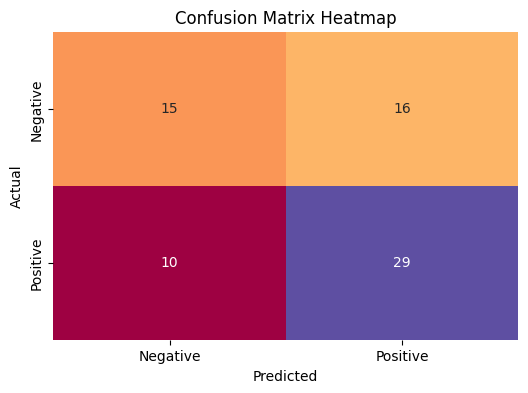

In [177]:
%matplotlib inline

# Compute confusion matrix
cm = confusion_matrix(yH_test, y_pred)


# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral', cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

**Observation:**
- Once we fixed the labels and did prediction we got much better results!

**Now let's try to run an ensemble method (random forest using News Articles Features only) with this and see the results**

- using T5 embeddings

In [178]:
# First, split into training+validation (80%) and test (20%) sets
XHT5_train, XHT5_test, yHT5_train, yHT5_test = train_test_split(df_T5, y_H_encoded, test_size=0.2,
                                                            random_state=42, shuffle=True, stratify=y_H_encoded)

# Output the shape of each split to verify
print("Training set size:", XHT5_train.shape)
print("Test set size:", XHT5_test.shape)

Training set size: (279, 1024)
Test set size: (70, 1024)


In [179]:
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=1) # minority class had only 2 samples, so, I had to change k_neighbors to 1

In [180]:
# Apply SMOTE to the training data
XHT5_train_over, yHT5_train_over = sm.fit_resample(XHT5_train, yHT5_train)


print("Original training dataset shape:", XHT5_train.shape, yHT5_train.shape)
print("Resampled training dataset shape:", XHT5_train_over.shape, yHT5_train_over.shape)



Original training dataset shape: (279, 1024) (279,)
Resampled training dataset shape: (459, 1024) (459,)


In [181]:
%%time
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report


# Choose the type of classifier.
# word2vec_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=42,bootstrap=True)
HFT5_news = RandomForestClassifier(random_state=42,bootstrap=True)


parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(HFT5_news, parameters, scoring='recall',cv=5,n_jobs=-1, verbose=1)
grid_obj = grid_obj.fit(XHT5_train_over, yHT5_train_over)

# Fit the best algorithm to the data.
HFT5_best_rf_newsOnly = grid_obj.best_estimator_
HFT5_best_rf_newsOnly.fit(XHT5_train_over, yHT5_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 7.8 s, sys: 178 ms, total: 7.98 s
Wall time: 1min


RandomForestClassifier(max_depth=5, max_features=0.3, n_estimators=50,
                       random_state=42)

In [182]:
# Save the model
import joblib
joblib.dump(HFT5_best_rf_newsOnly, 'HFT5_best_rf_newsOnly.pkl')

['HFT5_best_rf_newsOnly.pkl']

In [183]:
# Load the model
import joblib

HFT5_best_rf_newsOnly = joblib.load('HFT5_best_rf_newsOnly.pkl')

**Make Predictions on T5 Model with Hugging Face zero-shot label assignments**

**For some reason, I was getting an error during prediction saying that the column names of the X-Train and X-Test had a mismatch**

- I checked and verified that there was no mismatch in column names

**Solution**
- converted both the Train and Test for feature values to numpy arrays.
- refit the model using the numpy X-Train and original y-train (labels)

In [184]:
# Convert both training and test sets to NumPy arrays to avoid column name issues, since numpy arrays don't have column names
XHT5_train_over_array = XHT5_train_over.values
XHT5_test_array = XHT5_test.values

# Refit the model with the NumPy array
HFT5_best_rf_newsOnly.fit(XHT5_train_over_array, yHT5_train_over)

# Predict using the NumPy array version of the test set
y_pred = HFT5_best_rf_newsOnly.predict(XHT5_test_array)

# Accuracy
accuracy = accuracy_score(yH_test, y_pred)
print("Accuracy:", accuracy)

# Recall
recall = recall_score(yHT5_test, y_pred, average='macro')  # 'macro' averages recall across classes
print("Recall:", recall)

# Precision
precision = precision_score(yHT5_test, y_pred, average='macro')  # 'macro' averages precision across classes
print("Precision:", precision)

# F1-Score
f1 = f1_score(yHT5_test, y_pred, average='macro')  # 'macro' averages f1-score across classes
print("F1-Score:", f1)

print()


# Detailed Classification Report
print("Classification Report:\n", classification_report(yHT5_test, y_pred))


Accuracy: 0.8285714285714286
Recall: 0.8329197684036393
Precision: 0.8285714285714285
F1-Score: 0.828009828009828

Classification Report:
               precision    recall  f1-score   support

          -1       0.77      0.87      0.82        31
           1       0.89      0.79      0.84        39

    accuracy                           0.83        70
   macro avg       0.83      0.83      0.83        70
weighted avg       0.84      0.83      0.83        70



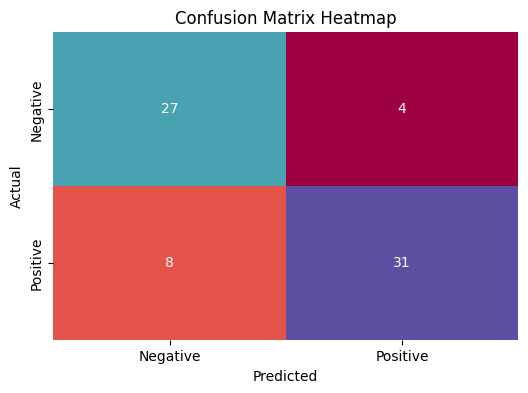

In [185]:
%matplotlib inline

# Compute confusion matrix
cm = confusion_matrix(yHT5_test, y_pred)


# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral', cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Let's compare the models

In [186]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to compute the evaluation metrics
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted')
    }



In [187]:
# Creating a comparision Data Frame
results = {}

# Add the results for each model
results['w2vec_best_rf'] = get_metrics(yw2v_test, w2vec_best_rf.predict(Xw2v_test))
results['w2vec_best_rf_newsOnly'] = get_metrics(yw2vNews_test, w2vec_best_rf_newsOnly.predict(Xw2vNews_test))
results['glove_best_rf'] = get_metrics(yglove_test, glove_best_rf.predict(Xglove_test))
results['glove_best_rf_newsOnly'] = get_metrics(ygloveNews_test, glove_best_rf_newsOnly.predict(XgloveNews_test))
results['T5_best_rf'] = get_metrics(yT5_test, y_pred = T5_best_rf.predict(XT5_test))
results['HF_best_rf_newsOnly'] = get_metrics(yH_test, HF_best_rf_newsOnly.predict(XH_test))
results['HFT5_best_rf_newsOnly'] = get_metrics(yHT5_test, HFT5_best_rf_newsOnly.predict(XHT5_test.values))

# Convert results to a Pandas DataFrame
results_df = pd.DataFrame(results)

# highlight best results
# Highlight the maximum value in each row (for each metric)
styled_results_df = results_df.style.highlight_max(axis=1)
display(styled_results_df)



,w2vec_best_rf,w2vec_best_rf_newsOnly,glove_best_rf,glove_best_rf_newsOnly,T5_best_rf,HF_best_rf_newsOnly,HFT5_best_rf_newsOnly
Accuracy,0.428571,0.442857,0.442857,0.400000,0.414286,0.628571,0.828571
Precision,0.421224,0.461786,0.452381,0.408000,0.402106,0.624762,0.835102
Recall,0.428571,0.442857,0.442857,0.400000,0.414286,0.628571,0.828571
F1 Score,0.424566,0.451067,0.443632,0.396987,0.405935,0.621939,0.829133


**Observations**

- Best Model: HFT5_best_rf_newsOnly

This model was built using the following process:

**1. Label Reassignment:**
- We initially observed that the original labels for the dataset were not accurately assigned. To address this, we used a Hugging Face zero-shot classifier to reassign sentiment labels. We compared these new labels to K-Means cluster assignments, further validating the need for reassignment.

**2. Data Splitting:**
- The dataset, with the newly assigned zero-shot sentiment labels, was split into training and testing sets.

**3. T5 Embeddings:**
- We used a T5 Sequence-to-Sequence tokenizer and embedder to generate embeddings for the news articles. These embeddings were used as the input features for our model.

**4. Model Training:**
- We applied an ensemble method (Random Forest) to train the model on the oversampled training data. SMOTE (Synthetic Minority Oversampling Technique) was used to handle class imbalance in the training set.

**Performance:**
The model achieved accuracy/precision/recall/F1 score of over 82% when making predictions on the test set.


---

## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

## Note:  I am using openAI for this piece of the project instead of llama-cpp-python

**Please refer to discussion posted by me in Discussion Forum.**

- an excerpt of the discussions is shown below:

**Question:**

- For the project are we forced to use llama-cpp-python ?  Or, can we use any LLM like openAI or Mistral.    I tried this with openAI  with API calls (using python) and have no issues.



- **Background information for asking this question:**

  - llama-cpp-python model is not running on GPU.  The examples shown in the training exercises "Additional Case Study News Article Categorization" to force run on GPU does not work.  I've already enclosed the error screenshot.  I have tried but was not able to force run on GPU. Perhaps the example shown in the case study used to work at one time, but it does not work any more on Google Colab.  It's obvious to me that these materials must have been created a while ago.
  - Given the above,  it's totally impossible to use llama-cpp-python for the project.  It took me more than 25 minutes to get answer to  a simple query like \"what is the capital of France\". Trying to go through the Add-Case_Study_News_Article_Categorization_and_Summarization.ipynb in the learning path, was impossible.  After 3 hours of running, it still did not complete, so I killed it.   
  - I finally modified my code to use openAI with API calls, and the exercises took minutes, instead of hours.

**Response from Academic Support 24**

Hi Soumitra,

If you can execute the task faster than with the method you previously implemented, you may consider using OpenAI.

Happy learning




### commenting out the below:

In [188]:
# # Installation for GPU llama-cpp-python
# # uncomment and run the following code in case GPU is being used
# !CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python -q

# # Installation for CPU llama-cpp-python
# # uncomment and run the following code in case GPU is not being used
# #!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

In [189]:
# # Function to download the model from the Hugging Face model hub
# from huggingface_hub import hf_hub_download

# # Importing the Llama class from the llama_cpp module
# from llama_cpp import Llama

# # Importing the library for data manipulation
# import pandas as pd

# from tqdm import tqdm # For progress bar related functionalities
# tqdm.pandas()

## Working with OpenAI APIs

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/GL-Projects/Project5-NLP/')
os.listdir()

['SM-V2-NLP_Project_Full_Code-1.ipynb',
 'stock_news.csv',
 'glove.6B.100d.txt.word2vec',
 'NLP_Project_Full_Code-1.ipynb',
 'NLP_Template.pptx',
 'xgboost_model.json',
 'SM_V0-NLP_Project_Full_Code-1.ipynb',
 'Temp_SM_V1-NLP_Project_Full_Code-1.ipynb',
 'df_T3.csv',
 'HF_best_rf_newsOnly.sav',
 'NLP_Project_Low_Code-2.ipynb',
 '.env',
 'SM_V1-NLP_Project_Full_Code-1.ipynb',
 'SM-tried_minority_V2-NLP_Project_Full_Code-1.ipynb',
 'best_xgb_model.pkl',
 '1st-submission-SM_V2-NLP_Project_Full_Code-1.html',
 'SM-submitted_1_V2-NLP_Project_Full_Code-1.ipynb',
 'cleaned_stock_data.csv',
 'df_Word2Vec.csv',
 'df_Glove.csv',
 'df_T5.csv',
 'w2vec_best_rf.pkl',
 'w2vec_best_rf_newsOnly.pkl',
 'glove_best_rf.pkl',
 'glove_best_rf_newsOnly.pkl',
 'T5_best_rf.pkl',
 'y_H.csv',
 'HF_best_rf_newsOnly.pkl',
 'HFT5_best_rf_newsOnly.pkl',
 'data_1.csv',
 'SM-V2-NLP_Project_Full_Code-1.html']

### writing a .env file to read the API Key

In [192]:
# %%writefile .env
# OPENAI_API_KEY="my_secret_key"

In [193]:
!pip install -q python-dotenv
!pip install -q prompts
!pip install -q openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00


In [194]:
import openai

In [195]:
import os
from dotenv import load_dotenv
load_dotenv()
openai.api_key = os.getenv('OPENAI_API_KEY')

#### Loading the data

In [196]:
import pandas as pd
import numpy as np


# View full DataFrame content: To display the full content of each column without truncation, use:
pd.set_option('display.max_colwidth', None)

In [197]:
data = pd.read_csv('stock_news.csv')

In [198]:
data.head(2)

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,-1


In [199]:
data.shape

(349, 8)

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


#### Aggregating the data weekly

In [201]:
data["Date"] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format.

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    349 non-null    datetime64[ns]
 1   News    349 non-null    object        
 2   Open    349 non-null    float64       
 3   High    349 non-null    float64       
 4   Low     349 non-null    float64       
 5   Close   349 non-null    float64       
 6   Volume  349 non-null    int64         
 7   Label   349 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 21.9+ KB


In [203]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

## checking the value counts for the groupby() object

In [204]:
weekly_grouped.value_counts()

Date        News                                                                                                                                                                                                                                                                                                                                                                                            Open       High       Low        Close      Volume     Label
2019-01-06  Apple Inc. lowered its quarterly sales forecast for the fiscal first quarter, underperforming analysts' expectations due to slowing Chinese economy and trade tensions. The news sent Apple shares tumbling and affected Asia-listed suppliers like Hon Hai Precision Industry Co Ltd, Taiwan Semiconductor Manufacturing Company, and LG Innot                                                 41.740002  42.244999  41.482498  40.246914  130672400  -1       1
            Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon                                                                                         41.740002  42.244999  41.482498  40.246914  130672400  -1       1
            Apple cut its quarterly revenue forecast for the first time in over 15 years due to weak iPhone sales in China, representing around 20% of Apple's revenue. This marks a significant downturn during Tim Cook's tenure and reflects broader economic concerns in China exacerbated by trade tensions with the US. U                                                                             43.570000  43.787498  43.222500  42.470604  103544800  -1       1
            Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10                                                              41.740002  42.244999  41.482498  40.246914  130672400  -1       1
            Apple's Q1 revenue guidance cut, resulting from weaker demand in China, led to an estimated $3.8 billion paper loss for Berkshire Hathaway due to its $252 million stake in Apple. This news, coupled with broad market declines, caused a significant $21.4 billion decrease in Berk                                                                                                           43.570000  43.787498  43.222500  42.470604  103544800  -1       1
                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ..
2019-05-05  The Czech Finance Ministry is finalizing plans to impose a digital tax on global internet giants, such as Google, Apple, Facebook, and Amazon, with a rate of 7 percent. This tax will primarily target advertising services and data sales. The tax could generate around 5 billion crowns (219 million USD) annually for the                                                                  50.764999  50.849998  49.777500  48.708790  186139600   0       1
            The Federal Reserve is anticipated to keep interest rates unchanged in their upcoming meeting, with a likelihood of a rate cut expected later this year. The Fed Chairman's press conference may provide significant market impact as investors seek insights on economic growth and inflation. Apple's e

In [205]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


**Notice, only the key column `Date` for groupby() and the agg column `News` remained**

In [206]:
weekly_grouped.head(2)

Date  \
0 2019-01-06   
1 2019-01-13   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [207]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Loading the model

In [208]:
models_available = openai.models.list().data


for model in models_available:
  print(model.id)



gpt-4-turbo
gpt-4-turbo-2024-04-09
gpt-4o
tts-1
tts-1-1106
chatgpt-4o-latest
dall-e-2
gpt-4-turbo-preview
gpt-3.5-turbo-instruct
gpt-4-0125-preview
gpt-3.5-turbo-0125
gpt-3.5-turbo
babbage-002
davinci-002
gpt-4o-realtime-preview-2024-10-01
dall-e-3
gpt-4o-realtime-preview
gpt-4o-2024-08-06
gpt-4o-mini
gpt-4o-2024-05-13
gpt-4o-mini-2024-07-18
tts-1-hd
tts-1-hd-1106
gpt-4-1106-preview
text-embedding-ada-002
gpt-3.5-turbo-16k
text-embedding-3-small
text-embedding-3-large
whisper-1
gpt-4o-audio-preview-2024-10-01
gpt-4o-audio-preview
gpt-3.5-turbo-1106
gpt-4-0613
gpt-4
gpt-3.5-turbo-instruct-0914


In [209]:
# load the gpt-4o model
model = 'gpt-4o'


#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

The purpose of the function extract_json_data() is to safely extract and parse a JSON object from a string that may contain extra content outside the JSON object. This is useful when the input string contains more than just the JSON object, such as additional text or characters, and you want to isolate and extract the valid JSON part for further processing.

In [210]:
import json

def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        # Check if both opening and closing braces exist
        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object

            # Try to load the JSON object
            try:
                data_dict = json.loads(extracted_category)

                # Convert back to JSON string with double quotes using json.dumps()
                # according to the JSON specification (defined by ECMA-404 and RFC 8259), both keys and string values in JSON must be enclosed in double quotes ("), not single quotes (').
                # python dictionary allows single quotes or double quotes, but json structure requires double quotes
                json_output = json.dumps(data_dict)  # Ensures double quotes in the final output
                return json_output

            except json.JSONDecodeError as e:
                # If there's an issue decoding the JSON, log the error and show the problematic string
                print(f"Error parsing JSON: {e} in response: {extracted_category}")
                return {}
        else:
            print(f"Warning: JSON object not found or incomplete: {json_str}")
            return {}



    except Exception as e:
        print(f"Unexpected error: {e}")
        return {}



## Defining the response function

In [211]:
detailed_instructions = """
1. The news article contains multiple segments, each separated by "||".
2. For each segment, identify the main subjects or entities mentioned.
3. Determine the key events or actions described.
4. Extract relevant keywords representing the topics. These keywords **must** be one word which categorizes the topic.
  as an example:  "Politics" or "Economy" or "Health"


**Important**: Return **at most 8 topics**
- Return the output in JSON format with keys as the topic number and values as the actual topic.
- do not include any extra formatting, or symbols such as '```json'. Only return the json object
- keys and values must have double quotes



Below is a sample output:
{"1": "Politics", "2": "Economy", "3": "Health" }
"""

In [212]:
instructions = f"""
Please read the news headline and extract the key topics.
detailed instructions: {detailed_instructions}

"""



## Regular epresssions:

**Regular Expression (r'(?<!")(\b\d+\b)(?=:)'):**
- r'': raw string
- \b\d+\b: This matches whole numbers (e.g., 1, 10, 5).
  - \d+: Matches one or more digits.
  - \b: Word boundary, ensures that we're matching full numbers (so 123 won't match within 1234, for example).
- (?<!"): This is a negative lookbehind that ensures the number is not already enclosed in quotes (i.e., the number doesn't have a preceding ").
- (?=:): This is a lookahead that ensures the number is followed by a colon (:), which is typical in JSON keys.
- **Replacement (r'"\1"'):**
- \1: This refers to the first matched group (the number).

The replacement adds double quotes around the matched number (e.g., 1: becomes "1":).

**Regular Expression (r'(?<=: )([A-Za-z0-9_,\.\'\s-]+)(?=,|})'):**
- (?<=: ): This is a lookbehind that ensures we're only capturing text that follows a colon and a space (: ), typical in JSON key-value pairs.
- [A-Za-z0-9_,\.\'\s-]+: This matches a sequence of letters (A-Za-z), digits (0-9), and certain allowed special characters (underscore _, comma ,, period ., single quote ', space \s, and hyphen -).
- This ensures that we're capturing typical text or non-numeric values that might be present in the JSON.
- (?=,|}): This is a lookahead that ensures the matched value is followed by either a comma (,), indicating it's part of a JSON list, or a closing brace (}), indicating it's the last element in the JSON object.
- **Replacement (r'"\1"'):**
- \1: Refers to the matched value.

The replacement adds double quotes around the matched value.

In [213]:
import re
import json

temperature = 0.0
max_tokens = 4096  # Increased max_tokens to accommodate more output
top_p = 0.95
frequency_penalty = 1.2
presence_penalty = 1.2

def generate_openai_response(instruction, review):
    messages = [
        {"role": "system", "content": instruction},
        {"role": "user", "content": review}
    ]

    completion = openai.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
        top_p=top_p,
        frequency_penalty=frequency_penalty,
        presence_penalty=presence_penalty,
        #stop=["\n\n"]  # Ensures proper end after JSON block
        stop=["}"]  # Stop generation once the JSON object is completed
    )

    # Strip off any unwanted characters and try parsing the JSON
    output = completion.choices[0].message.content.strip()

    # Attempt to close the JSON if it's incomplete
    if not output.endswith("}"):
        output += "}"

    # Fix missing quotes around keys
    output = re.sub(r'(?<!")(\b\d+\b)(?=:)', r'"\1"', output)  # Adds quotes around unquoted numbers

    # Fix missing quotes around values (non-numeric values)
    output = re.sub(r'(?<=: )([A-Za-z0-9_,\.\'\s-]+)(?=,|})', r'"\1"', output)


    # Fix any trailing commas before the closing brace
    if output.endswith(",}"):
        output = output[:-2] + "}"  # Remove the trailing comma and add the closing brace

    # Fix missing double quotes around values in object-like structures
    output = re.sub(r'(?<=: {)([^}]+)(?=})', r'"\1"', output)  # This fixes values inside {} without quotes

    # Replace curly quotes with straight quotes
    output = output.replace('“', '"').replace('”', '"')



    # Attempt to load and validate the JSON
    try:
        json_data = json.loads(output)
    except json.JSONDecodeError as e:
        print("Invalid JSON response:", e)
        return output  # Fallback: Return output for inspection

    # Convert back to JSON string with double quotes using json.dumps()
    # according to the JSON specification (defined by ECMA-404 and RFC 8259), both keys and string values in JSON must be enclosed in double quotes ("), not single quotes (').
    json_output = json.dumps(json_data)  # Ensures double quotes in the final output


    return json_output




## checking for 1 weeks summary as test

In [214]:
news = data_1.loc[17, 'News']
news

' Spotify reported better-than-expected Q1 revenue growth, reaching 100 million paid subscribers despite increasing competition from Apple Music, Amazon, and Google. The streaming giant seeks expansion in emerging markets and continues aggressive pricing strategies. The company aims to grow at over 30% per year with 107-11 ||  The S&P 500 reached a new intraday record high on Monday, fueled by strong consumer spending data and tame inflation. The index, along with the Nasdaq, closed at another record. The bull market\'s longevity is seen continuing due to hopes of trade deal resolution, upbeat earnings, ||  This news article reports on Spotify\'s first quarter financial results. The company exceeded revenue expectations, with revenues growing by 33% to €1.51 billion, driven mainly by paid user subscriptions which accounted for 92% of revenues. Spotify reached a milestone of 100 million paid ||  The Czech Finance Ministry is finalizing plans to impose a digital tax on global internet gi

In [215]:
len(news)

3838

**Splitting to see how many news articles there are in 1 particular row**

In [216]:
news.split('||')

[' Spotify reported better-than-expected Q1 revenue growth, reaching 100 million paid subscribers despite increasing competition from Apple Music, Amazon, and Google. The streaming giant seeks expansion in emerging markets and continues aggressive pricing strategies. The company aims to grow at over 30% per year with 107-11 ',
 "  The S&P 500 reached a new intraday record high on Monday, fueled by strong consumer spending data and tame inflation. The index, along with the Nasdaq, closed at another record. The bull market's longevity is seen continuing due to hopes of trade deal resolution, upbeat earnings, ",
 "  This news article reports on Spotify's first quarter financial results. The company exceeded revenue expectations, with revenues growing by 33% to €1.51 billion, driven mainly by paid user subscriptions which accounted for 92% of revenues. Spotify reached a milestone of 100 million paid ",
 '  The Czech Finance Ministry is finalizing plans to impose a digital tax on global int

In [217]:
len(news.split('||'))

12

**Purpose of `get_categories()` function**

The get_categories() function is designed to analyze news content, generate topic summaries for each segment of the news, and then return a unique set of topics in a consolidated format.

- **Segment the News:** The function splits the input news content into separate segments based on the delimiter ||.
- **Generate Summaries:** For each news segment, it calls generate_openai_response() to get a summary in the form of a JSON string.
- **Extract Unique Topics:** After generating the summaries, it extracts the topics from each summary and consolidates them into a unique list of topics.
- **Return Consolidated Topics:** The function returns a dictionary with unique topics, where each topic is assigned a unique key.

**Details of steps:**

1. **Step1:** Create Summary dictionary with categories for each segment
```python
  news_segments = news.split('||')
  summary = {} # initializing empty dictionary

  for i, segment in enumerate(news_segments):
      if segment.strip():  # Only process non-empty segments
          segment_summary = generate_openai_response(instructions, segment.strip()) # calls our generate function to get json output for the segment
          summary[i + 1] = segment_summary #populates the dictionary with key/values
```            

  - Example of **summary** dictionary after processing:
```csv
{
    1: '{"1": "Entertainment", "2": "Technology"}',
    2: '{"1": "Economy", "2": "Finance"}',
    3: '{"1": "Automotive", "2": "Innovation"}'
}
```
2. **Create an empty set.**  Python sets automatically remove duplicate values

```python
combined_topics = set()  # Using a set to keep unique values
```

3. **Load the summary items, 1 at a time**:
```python
for key, json_str in summary.items():
  topics_dict = json.loads(json_str)
  ```
3a. each key, json_str will be loaded per iteration as such:
```csv
1 {"1": "Entertainment", "2": "Technology"} # first loop
2 {"1": "Economy", "2": "Finance"} # second loop
3 {"1": "Automotive", "2": "Innovation"} # 3rd loop
```
3b. each loop will add to the topics_dict as such:
```csv
{'1': 'Entertainment', '2': 'Technology'}
{'1': 'Economy', '2': 'Finance'}
{'1': 'Automotive', '2': 'Innovation'}
```

4. **Populating the set with the values of topic_dict**
```python
combined_topics.update(topics_dict.values()) # still inside the for loop
```
- This will put all the topic categories in the set and get rid of duplicates.

  - In the example shown, combined_topic will now look like:
```csv
{'Finance', 'Innovation', 'Economy', 'Technology', 'Automotive', 'Entertainment'}
```

5. **Finally create the dictionary (still inside the loop)**
```python
unique_topics_dict = {i + 1: topic for i, topic in enumerate(sorted(combined_topics))}  
```
Dictionary in example will now look like this:
```csv
{1: 'Automotive', 2: 'Economy', 3: 'Entertainment', 4: 'Finance', 5: 'Innovation', 6: 'Technology'}
```




In [218]:
  def get_categories(news):

    news_segments = news.split('||')
    summary = {} # initializing empty dictionary

    for i, segment in enumerate(news_segments):
        if segment.strip():  # Only process non-empty segments
            segment_summary = generate_openai_response(instructions, segment.strip()) # calls our generate function to get json output for the segment
            summary[i + 1] = segment_summary #populates the dictionary with key/values


    combined_topics = set()  # Using a set to keep unique values

    for key, json_str in summary.items():
        # Load the JSON string into a dictionary
        topics_dict = json.loads(json_str)

        # Add all the values (topics) to the set to ensure uniqueness
        combined_topics.update(topics_dict.values())

        # Create a single JSON output with unique values, assign each unique value a key
        unique_topics_dict = {i + 1: topic for i, topic in enumerate(sorted(combined_topics))}

    # Convert the dictionary to a JSON string
    unique_topics_json = json.dumps(unique_topics_dict)
    return unique_topics_json




### Now testing the function with

In [219]:
get_categories(news)

'{"1": "Business", "2": "Economy", "3": "Finance", "4": "Investment", "5": "Manufacturing", "6": "Media", "7": "Politics", "8": "Taxation", "9": "Technology", "10": "Trade"}'

## Now apply the function to all the weekly grouped News

**iterrows():**
- This function is used to iterate over a pandas DataFrame row by row. Each iteration returns the index of the row and a pandas Series representing the data in that row.

In [220]:
%%time

# Apply function with a print statement to show progress and news length
for idx, row in data_1.iterrows():
    news_length = len(row['News'])  # Calculate the length of the news content
    print(f"Processing News {idx + 1}... (Length: {news_length} characters)")
    #data_1.at[idx, 'Key Events'] = generate_openai_response(instructions, row['News'])
    data_1.at[idx, 'Key Events'] = get_categories(row['News'])



Processing News 1... (Length: 16090 characters)
Processing News 2... (Length: 9467 characters)
Processing News 3... (Length: 9281 characters)
Processing News 4... (Length: 6580 characters)
Processing News 5... (Length: 11370 characters)
Processing News 6... (Length: 4915 characters)
Processing News 7... (Length: 5535 characters)
Processing News 8... (Length: 2651 characters)
Processing News 9... (Length: 2765 characters)
Processing News 10... (Length: 3115 characters)
Processing News 11... (Length: 5109 characters)
Processing News 12... (Length: 5481 characters)
Processing News 13... (Length: 7255 characters)
Processing News 14... (Length: 3776 characters)
Processing News 15... (Length: 2244 characters)
Processing News 16... (Length: 6576 characters)
Processing News 17... (Length: 3898 characters)
Processing News 18... (Length: 3838 characters)
CPU times: user 3.87 s, sys: 297 ms, total: 4.17 s
Wall time: 6min 8s


In [221]:
data_1["Key Events"]

,Key Events
0,"{""1"": ""Banking"", ""2"": ""Biotechnology"", ""3"": ""Business"", ""4"": ""Conference"", ""5"": ""Currency"", ""6"": ""Cybersecurity"", ""7"": ""Diplomacy"", ""8"": ""Economy"", ""9"": ""Employment"", ""10"": ""Energy"", ""11"": ""Entertainment"", ""12"": ""Finance"", ""13"": ""Government"", ""14"": ""Industry"", ""15"": ""Investment"", ""16"": ""Law"", ""17"": ""Legal"", ""18"": ""Manufacturing"", ""19"": ""Markets"", ""20"": ""Monetary"", ""21"": ""Politics"", ""22"": ""Regulation"", ""23"": ""StockMarket"", ""24"": ""Technology"", ""25"": ""Trade""}"
1,"{""1"": ""Automotive"", ""2"": ""Business"", ""3"": ""Currency"", ""4"": ""Economy"", ""5"": ""Finance"", ""6"": ""Governance"", ""7"": ""Investigation"", ""8"": ""Investment"", ""9"": ""Leadership"", ""10"": ""Music"", ""11"": ""Pharmaceuticals"", ""12"": ""Politics"", ""13"": ""Taxation"", ""14"": ""Technology"", ""15"": ""Trade""}"
2,"{""1"": ""Business"", ""2"": ""Cryptocurrency"", ""3"": ""Economy"", ""4"": ""Employment"", ""5"": ""Energy"", ""6"": ""Entertainment"", ""7"": ""Finance"", ""8"": ""Healthcare"", ""9"": ""Innovation"", ""10"": ""Investment"", ""11"": ""Law"", ""12"": ""Legal"", ""13"": ""Politics"", ""14"": ""Regulation"", ""15"": ""StockMarket"", ""16"": ""Technology"", ""17"": ""Trade""}"
3,"{""1"": ""Automotive"", ""2"": ""Business"", ""3"": ""Currency"", ""4"": ""Diplomacy"", ""5"": ""Economy"", ""6"": ""Employment"", ""7"": ""Finance"", ""8"": ""Investment"", ""9"": ""Logistics"", ""10"": ""Politics"", ""11"": ""Technology"", ""12"": ""Trade""}"
4,"{""1"": ""Automotive"", ""2"": ""Business"", ""3"": ""Consumer"", ""4"": ""Crime"", ""5"": ""Cybersecurity"", ""6"": ""E-commerce"", ""7"": ""Economy"", ""8"": ""Electronics"", ""9"": ""Employment"", ""10"": ""Entertainment"", ""11"": ""Espionage"", ""12"": ""Film"", ""13"": ""Finance"", ""14"": ""Fraud"", ""15"": ""Health"", ""16"": ""InternationalRelations"", ""17"": ""Investigation"", ""18"": ""Justice"", ""19"": ""Lawsuit"", ""20"": ""Manufacturing"", ""21"": ""Music"", ""22"": ""Politics"", ""23"": ""Privacy"", ""24"": ""Regulation"", ""25"": ""Security"", ""26"": ""Technology"", ""27"": ""Telecommunications"", ""28"": ""Trade""}"
5,"{""1"": ""Business"", ""2"": ""Economy"", ""3"": ""Education"", ""4"": ""Energy"", ""5"": ""Finance"", ""6"": ""Mining"", ""7"": ""Politics"", ""8"": ""Privacy"", ""9"": ""Retail"", ""10"": ""SocialMedia"", ""11"": ""Taxation"", ""12"": ""Technology""}"
6,"{""1"": ""Advertising"", ""2"": ""Automotive"", ""3"": ""Business"", ""4"": ""Competition"", ""5"": ""Crime"", ""6"": ""Cybersecurity"", ""7"": ""Economy"", ""8"": ""Energy"", ""9"": ""Entertainment"", ""10"": ""Finance"", ""11"": ""Investment"", ""12"": ""Investments"", ""13"": ""Law"", ""14"": ""Politics"", ""15"": ""Regulation"", ""16"": ""Regulations"", ""17"": ""Sports"", ""18"": ""Technology"", ""19"": ""Trade""}"
7,"{""1"": ""Advocacy"", ""2"": ""Automotive"", ""3"": ""Aviation"", ""4"": ""Business"", ""5"": ""Economy"", ""6"": ""Entertainment"", ""7"": ""Finance"", ""8"": ""GenderEquality"", ""9"": ""Regulation"", ""10"": ""Security"", ""11"": ""Technology""}"
8,"{""1"": ""Business"", ""2"": ""Cybersecurity"", ""3"": ""Economy"", ""4"": ""Employment"", ""5"": ""Finance"", ""6"": ""Technology"", ""7"": ""Telecommunications"", ""8"": ""Trade""}"
9,"{""1"": ""Automotive"", ""2"": ""Business"", ""3"": ""Controversy"", ""4"": ""Cryptocurrency"", ""5"": ""Cybersecurity"", ""6"": ""Economy"", ""7"": ""Education"", ""8"": ""Entertainment"", ""9"": ""Finance"", ""10"": ""Intelligence"", ""11"": ""Media"", ""12"": ""Politics"", ""13"": ""Regulation"", ""14"": ""SocialMedia"", ""15"": ""Technology""}"


In [222]:
data_1.head(1)

Date  \
0 2019-01-06   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [223]:
# save the df
data_1.to_csv('data_1.csv', index=False)

In [224]:
# load the data
data_1 = pd.read_csv('data_1.csv')

---

## Formatting the model output

### Check to see if there are empty dictionaries

In [225]:
data_1[data_1['Key Events']=={}]

,Date,News,Key Events


**Observation:**
- No empty dictionaries

### Now using our extract_json_data() function to each 'Key Events', one at a time

In [226]:
data_1['model_response_parsed'] = data_1['Key Events'].apply(extract_json_data)
data_1.head(2)

Date  \
0  2019-01-06   
1  2019-01-13   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [227]:
data_1['model_response_parsed'].head(2)

,model_response_parsed
0,"{""1"": ""Banking"", ""2"": ""Biotechnology"", ""3"": ""Business"", ""4"": ""Conference"", ""5"": ""Currency"", ""6"": ""Cybersecurity"", ""7"": ""Diplomacy"", ""8"": ""Economy"", ""9"": ""Employment"", ""10"": ""Energy"", ""11"": ""Entertainment"", ""12"": ""Finance"", ""13"": ""Government"", ""14"": ""Industry"", ""15"": ""Investment"", ""16"": ""Law"", ""17"": ""Legal"", ""18"": ""Manufacturing"", ""19"": ""Markets"", ""20"": ""Monetary"", ""21"": ""Politics"", ""22"": ""Regulation"", ""23"": ""StockMarket"", ""24"": ""Technology"", ""25"": ""Trade""}"
1,"{""1"": ""Automotive"", ""2"": ""Business"", ""3"": ""Currency"", ""4"": ""Economy"", ""5"": ""Finance"", ""6"": ""Governance"", ""7"": ""Investigation"", ""8"": ""Investment"", ""9"": ""Leadership"", ""10"": ""Music"", ""11"": ""Pharmaceuticals"", ""12"": ""Politics"", ""13"": ""Taxation"", ""14"": ""Technology"", ""15"": ""Trade""}"


In [228]:
df_test = data_1['model_response_parsed'].apply(json.loads)
df_test.head(2)

,model_response_parsed
0,"{'1': 'Banking', '2': 'Biotechnology', '3': 'Business', '4': 'Conference', '5': 'Currency', '6': 'Cybersecurity', '7': 'Diplomacy', '8': 'Economy', '9': 'Employment', '10': 'Energy', '11': 'Entertainment', '12': 'Finance', '13': 'Government', '14': 'Industry', '15': 'Investment', '16': 'Law', '17': 'Legal', '18': 'Manufacturing', '19': 'Markets', '20': 'Monetary', '21': 'Politics', '22': 'Regulation', '23': 'StockMarket', '24': 'Technology', '25': 'Trade'}"
1,"{'1': 'Automotive', '2': 'Business', '3': 'Currency', '4': 'Economy', '5': 'Finance', '6': 'Governance', '7': 'Investigation', '8': 'Investment', '9': 'Leadership', '10': 'Music', '11': 'Pharmaceuticals', '12': 'Politics', '13': 'Taxation', '14': 'Technology', '15': 'Trade'}"


In [229]:
# convert df_test series to pandas df
df_test= pd.DataFrame(df_test)
df_test.head(2)

,model_response_parsed
0,"{'1': 'Banking', '2': 'Biotechnology', '3': 'Business', '4': 'Conference', '5': 'Currency', '6': 'Cybersecurity', '7': 'Diplomacy', '8': 'Economy', '9': 'Employment', '10': 'Energy', '11': 'Entertainment', '12': 'Finance', '13': 'Government', '14': 'Industry', '15': 'Investment', '16': 'Law', '17': 'Legal', '18': 'Manufacturing', '19': 'Markets', '20': 'Monetary', '21': 'Politics', '22': 'Regulation', '23': 'StockMarket', '24': 'Technology', '25': 'Trade'}"
1,"{'1': 'Automotive', '2': 'Business', '3': 'Currency', '4': 'Economy', '5': 'Finance', '6': 'Governance', '7': 'Investigation', '8': 'Investment', '9': 'Leadership', '10': 'Music', '11': 'Pharmaceuticals', '12': 'Politics', '13': 'Taxation', '14': 'Technology', '15': 'Trade'}"


In [230]:
# Use pd.json_normalize() to expand the dictionaries into columns
df_test = pd.json_normalize(df_test['model_response_parsed'])
df_test.head(10)

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,Banking,Biotechnology,Business,Conference,Currency,Cybersecurity,Diplomacy,Economy,Employment,Energy,...,Markets,Monetary,Politics,Regulation,StockMarket,Technology,Trade,NaN,NaN,NaN
1,Automotive,Business,Currency,Economy,Finance,Governance,Investigation,Investment,Leadership,Music,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Business,Cryptocurrency,Economy,Employment,Energy,Entertainment,Finance,Healthcare,Innovation,Investment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Automotive,Business,Currency,Diplomacy,Economy,Employment,Finance,Investment,Logistics,Politics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Automotive,Business,Consumer,Crime,Cybersecurity,E-commerce,Economy,Electronics,Employment,Entertainment,...,Lawsuit,Manufacturing,Music,Politics,Privacy,Regulation,Security,Technology,Telecommunications,Trade
5,Business,Economy,Education,Energy,Finance,Mining,Politics,Privacy,Retail,SocialMedia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Advertising,Automotive,Business,Competition,Crime,Cybersecurity,Economy,Energy,Entertainment,Finance,...,Trade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Advocacy,Automotive,Aviation,Business,Economy,Entertainment,Finance,GenderEquality,Regulation,Security,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Business,Cybersecurity,Economy,Employment,Finance,Technology,Telecommunications,Trade,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Automotive,Business,Controversy,Cryptocurrency,Cybersecurity,Economy,Education,Entertainment,Finance,Intelligence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replace missing values

In [231]:
df_filled = df_test.fillna('None')


In [232]:
# View all columns: To display all columns, you can set the display.max_columns option.
#pd.set_option('display.max_columns', None)

In [233]:
df_filled

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,Banking,Biotechnology,Business,Conference,Currency,Cybersecurity,Diplomacy,Economy,Employment,Energy,...,Markets,Monetary,Politics,Regulation,StockMarket,Technology,Trade,None,None,None
1,Automotive,Business,Currency,Economy,Finance,Governance,Investigation,Investment,Leadership,Music,...,None,None,None,None,None,None,None,None,None,None
2,Business,Cryptocurrency,Economy,Employment,Energy,Entertainment,Finance,Healthcare,Innovation,Investment,...,None,None,None,None,None,None,None,None,None,None
3,Automotive,Business,Currency,Diplomacy,Economy,Employment,Finance,Investment,Logistics,Politics,...,None,None,None,None,None,None,None,None,None,None
4,Automotive,Business,Consumer,Crime,Cybersecurity,E-commerce,Economy,Electronics,Employment,Entertainment,...,Lawsuit,Manufacturing,Music,Politics,Privacy,Regulation,Security,Technology,Telecommunications,Trade
5,Business,Economy,Education,Energy,Finance,Mining,Politics,Privacy,Retail,SocialMedia,...,None,None,None,None,None,None,None,None,None,None
6,Advertising,Automotive,Business,Competition,Crime,Cybersecurity,Economy,Energy,Entertainment,Finance,...,Trade,None,None,None,None,None,None,None,None,None
7,Advocacy,Automotive,Aviation,Business,Economy,Entertainment,Finance,GenderEquality,Regulation,Security,...,None,None,None,None,None,None,None,None,None,None
8,Business,Cybersecurity,Economy,Employment,Finance,Technology,Telecommunications,Trade,None,None,...,None,None,None,None,None,None,None,None,None,None
9,Automotive,Business,Controversy,Cryptocurrency,Cybersecurity,Economy,Education,Entertainment,Finance,Intelligence,...,None,None,None,None,None,None,None,None,None,None


In [234]:
df_filled.shape

(18, 28)

In [235]:
summary_stats = df_filled.describe().T
summary_stats


,count,unique,top,freq
1,18,6,Business,7
2,18,9,Business,7
3,18,12,Economy,4
4,18,14,Economy,2
5,18,8,Economy,5
6,18,14,Entertainment,3
7,18,11,Finance,5
8,18,16,Investment,2
9,18,16,Employment,2
10,18,16,Music,2


**Observations**
- shows statistics per column
- as an example, in column2: there are 18 items out of which 7 are unique and Business shows up 10 times

# **Conclusions and Recommendations**

## **Conclusions:**

### **Model Building and Prediction Section:**


- This project successfully implemented **sentiment analysis** and t**opic modeling** using state-of-the-art natural language processing (NLP) techniques. By leveraging various models, such as **Word2Vec, GloVe, T5, Hugging Face's all-MiniLM-L6-v2, and Facebook's BART-large-MNLI**, we demonstrated how modern NLP methods can handle complex language tasks and deliver high performance.

**Best Model: HFT5_best_rf_newsOnly**

This model was built using the following process:

1. **Label Reassignment:**
- The original sentiment labels in the dataset were found to be misaligned. To rectify this, we used the Hugging Face zero-shot classifier to reassign sentiment labels. Validation with K-Means cluster assignments confirmed that the reassigned labels were more accurate and consistent with the data.
2. **Data Splitting:**
- After relabeling the dataset with the zero-shot classifier, we split the data into training and testing sets to evaluate the model's performance.
3. **T5 Embeddings:**
To represent the news articles in a meaningful way, we used a T5 Sequence-to-Sequence tokenizer and embedder to generate embeddings for the text. These embeddings provided a rich feature set for model training.
4. **Model Training:**
- We applied an ensemble method using Random Forest, with SMOTE (Synthetic Minority Oversampling Technique) to address class imbalance in the training set. This allowed the model to learn from a balanced representation of the classes.

**Performance:** The final model achieved an accuracy/recall/precision/recall of over 82% on the test set, demonstrating strong predictive capabilities for the task of sentiment analysis.

### **News Article Categorization Section:**

In addition to sentiment analysis, the project successfully categorized news articles by leveraging **OpenAI’s API** to summarize and categorize the articles. The results were outputted in **JSON format and subsequently structured into a Pandas DataFrame for further analysis.** This provides a foundation for automated content analysis and classification in future projects.

### **Recommendations**
1. **Data Enhancement:**
- To further improve model performance and generalizability, future work could benefit from incorporating a more diverse and comprehensive dataset. Additional features, such as syntactic structures (e.g., dependency parsing) or semantic relations (e.g., entity linking or coreference resolution), could improve both model accuracy and interpretability.
2. **Efficiency Optimizations:**
- Although the current model performed well, computational efficiency could be improved. Future iterations could explore techniques like model pruning (removing less important weights), quantization (reducing the precision of the model’s weights), or using lighter architectures like DistilBERT or other distilled transformer models. These optimizations would reduce overhead and make the model more suitable for production environments with limited computational resources.
3. **Error Analysis and Fine-Tuning:**
- Conducting a deeper error analysis could reveal common misclassifications or patterns in the data that the model struggles with. This insight can guide targeted improvements, such as fine-tuning with domain-specific data or adjusting the hyperparameters.
4. **Exploring Other Model Architectures:**
- While Random Forest performed well, exploring other deep learning architectures like transformers (BERT, RoBERTa) or recurrent neural networks (LSTMs, GRUs) could provide further insights into how the data can be represented and analyzed. Combining traditional ensemble methods with deep learning models might enhance the model's performance on more complex text patterns.













<font size=6 color='blue'>Power Ahead</font>
___

# Submission

**First clear widget related issues**
- was having issues converting to html without clearing

In [4]:
%%shell

jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --to notebook --inplace SM-V2-NLP_Project_Full_Code-1.ipynb



[NbConvertApp] Converting notebook SM-V2-NLP_Project_Full_Code-1.ipynb to notebook
[NbConvertApp] Writing 2412399 bytes to SM-V2-NLP_Project_Full_Code-1.ipynb


In [5]:
%%shell
jupyter nbconvert SM-V2-NLP_Project_Full_Code-1.ipynb --to html


[NbConvertApp] Converting notebook SM-V2-NLP_Project_Full_Code-1.ipynb to html
[NbConvertApp] Writing 2912041 bytes to SM-V2-NLP_Project_Full_Code-1.html


In [238]:
os.listdir()

['SM-V2-NLP_Project_Full_Code-1.ipynb',
 'stock_news.csv',
 'glove.6B.100d.txt.word2vec',
 'NLP_Project_Full_Code-1.ipynb',
 'NLP_Template.pptx',
 'xgboost_model.json',
 'SM_V0-NLP_Project_Full_Code-1.ipynb',
 'Temp_SM_V1-NLP_Project_Full_Code-1.ipynb',
 'df_T3.csv',
 'HF_best_rf_newsOnly.sav',
 'NLP_Project_Low_Code-2.ipynb',
 '.env',
 'SM_V1-NLP_Project_Full_Code-1.ipynb',
 'SM-tried_minority_V2-NLP_Project_Full_Code-1.ipynb',
 'best_xgb_model.pkl',
 'cleaned_stock_data.csv',
 'df_Word2Vec.csv',
 'df_Glove.csv',
 '1st-submission-SM_V2-NLP_Project_Full_Code-1.html',
 'df_T5.csv',
 'w2vec_best_rf.pkl',
 'w2vec_best_rf_newsOnly.pkl',
 'glove_best_rf.pkl',
 'glove_best_rf_newsOnly.pkl',
 'T5_best_rf.pkl',
 'y_H.csv',
 'HF_best_rf_newsOnly.pkl',
 'HFT5_best_rf_newsOnly.pkl',
 'data_1.csv',
 'SM-V2-NLP_Project_Full_Code-1.html',
 'SM-submitted_1_V2-NLP_Project_Full_Code-1.ipynb']